**MScFE 622 STOCHASTIC MODELING**

**Group Work Project: 3**

**Group:  7372**

**Group Members:**
* Gabriel Omondi Odero
* Eric Komla Anku
* Alpha K Kamara

# **Step 1: Literature Review and Selective Analysis of Huo’s Multi-Armed Bandit Paper**

The paper investigates the risk-aware multi-armed bandit problem, a framework for sequential decision-making under uncertainty. Huo's Risk-aware multi-armed bandit problem with application to portfolio selection outlines key points on using multi-armed bandits for portfolio selection.  The goal is to balance trying new investments and sticking with existing profitable ones. A key part is Algorithm 1, which shows the steps for applying reinforcement learning to guide portfolio choices over time.  It also brings risk measures like CVaR, so downside potential factors into the decisions.  While theoretical proofs aren't needed for this task, it's good to know risk drives the strategies.

Hou and Fu tested their ideas on 30 stocks from places like banks and other companies.  We'll use that list of stocks later to get data to try the approach.  The main sections to focus on cover how they set up the portfolio selection problem what data you need, and the details of Algorithm 1 to walk through implementing their ideas  (Huo and Fu).

# **Step 2: Defining Portfolio Selection as a Multi-Armed Bandit Problem with Pseudocode**

**Pseudocode**
1. Obtain historical asset returns for each asset at the current time to infinity.

2. Select a basket of assets using graph approach to filter those assets.

3. At each time, select a portfolio and observe the rewards.

# **Step 3: Data Collection and Preparation for Financial and Non-Financial Institutions**

a. Member A collects the data for 15 financial institutions (JPM,WFC, BAC, C, GS, USB, MS, KEY, PNC, COF, AXP, PRU, SCHW, BBT, STI)

b. Member B collects the data for 15 non-financial institutions (KR, PFE, XOM, WMT, DAL, CSCO, HCP, EQIX, DUK, NFLX, GE, APA, F, REGN, CMS).

c. Member C combines the data into a suitable Python time series data structure. Member C will also compute the daily returns of all 30 series.

Data for JPM retrieved successfully.
Data for WFC retrieved successfully.
Data for BAC retrieved successfully.
Data for C retrieved successfully.
Data for GS retrieved successfully.
Data for USB retrieved successfully.
Data for MS retrieved successfully.
Data for KEY retrieved successfully.
Data for PNC retrieved successfully.
Data for COF retrieved successfully.
Data for AXP retrieved successfully.
Data for PRU retrieved successfully.
Data for SCHW retrieved successfully.
Data for TFC retrieved successfully.
Data for ^STI retrieved successfully.
Data for KR retrieved successfully.
Data for PFE retrieved successfully.
Data for XOM retrieved successfully.
Data for WMT retrieved successfully.
Data for DAL retrieved successfully.
Data for CSCO retrieved successfully.
Data for DOC retrieved successfully.
Data for EQIX retrieved successfully.
Data for DUK retrieved successfully.
Data for NFLX retrieved successfully.
Data for GE retrieved successfully.
Data for APA retrieved successfully.
Da

<ipython-input-1-2950400199c1>:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_combined_returns = data_combined.pct_change().dropna()


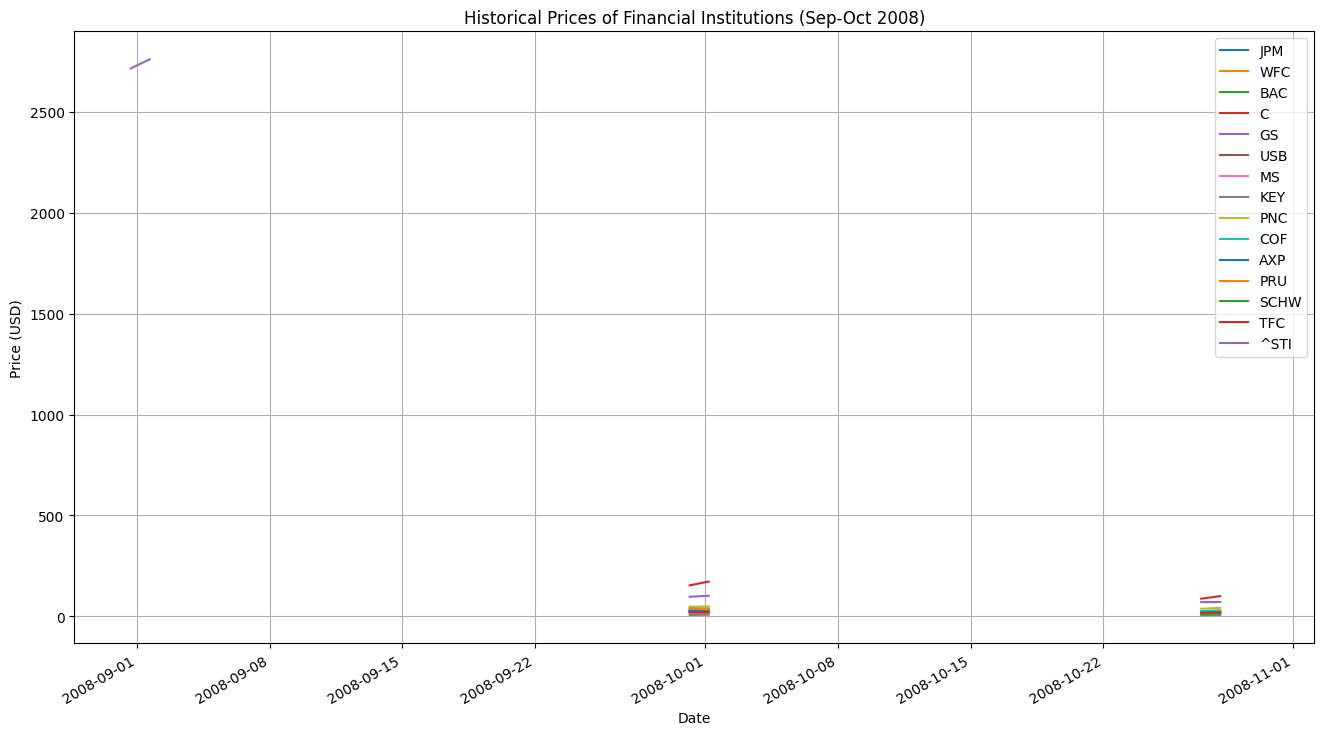

<ipython-input-1-2950400199c1>:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  financial_data_returns = financial_data.pct_change().dropna()


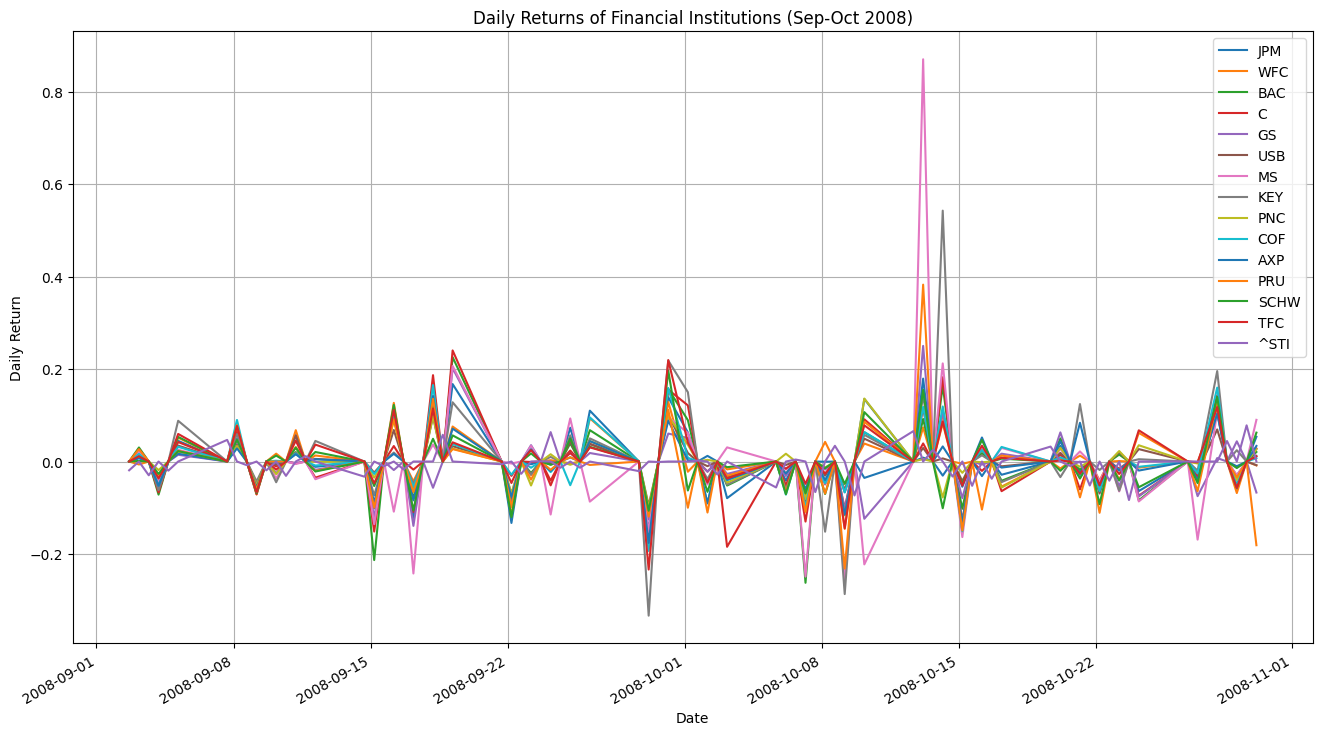

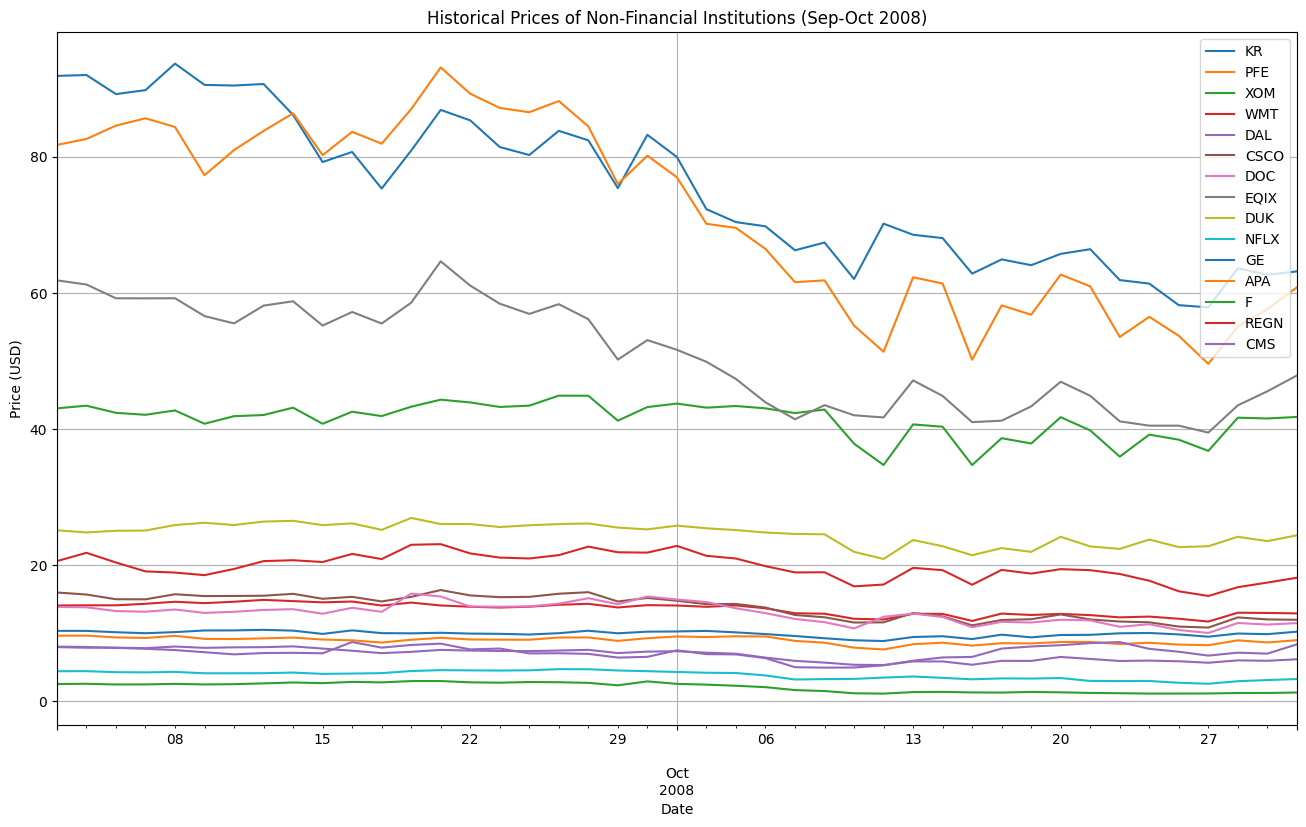

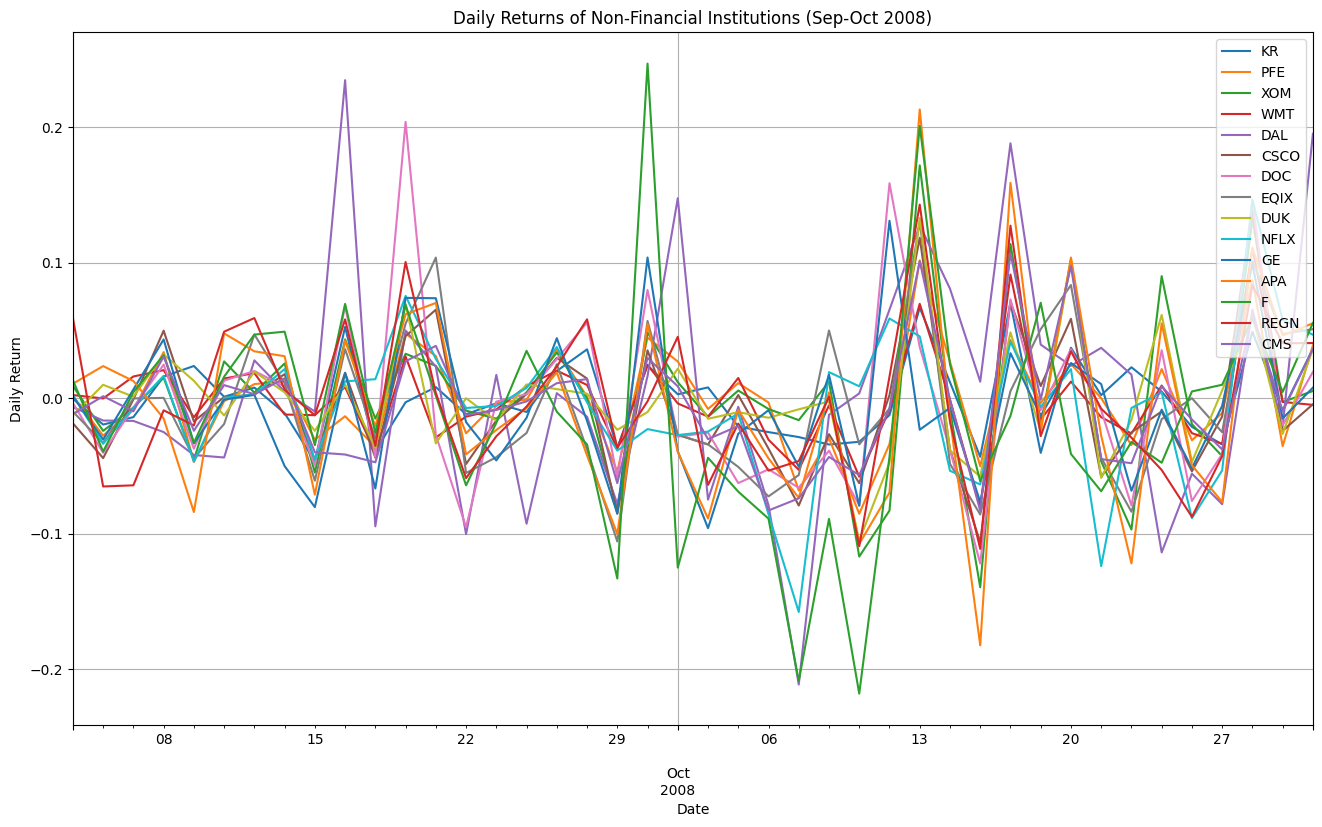


Table of daily returns:
                                JPM       WFC       BAC         C        GS  \
Date                                                                          
2008-09-02 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2008-09-03 04:00:00+00:00  0.018466 -0.006408  0.030322  0.026164  0.013852   
2008-09-03 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2008-09-04 04:00:00+00:00 -0.045329 -0.043212 -0.071602 -0.066803 -0.040034   
2008-09-04 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
...                             ...       ...       ...       ...       ...   
2008-10-28 04:00:00+00:00  0.105882  0.117743  0.121286  0.143222  0.007429   
2008-10-28 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2008-10-29 04:00:00+00:00 -0.050266 -0.068195 -0.030408 -0.037286  0.043711   
2008-10-29 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2008-10-30 04:00:00+00:00  

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Set up date range for data retrieval
start_date = '2008-09-01'
end_date = '2008-10-31'

# Define the lists of financial and non-financial institutions
financial_institutions = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP", "PRU", "SCHW", "TFC", "^STI"]
non_financial_institutions = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "DOC", "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"]

# Function to get historical data from Yahoo Finance
def get_historical_data(symbols, start, end):
    data_dict = {}
    for symbol in symbols:
        try:
            stock_data = yf.Ticker(symbol).history(start=start, end=end)
            if not stock_data.empty:
                data_dict[symbol] = stock_data['Close']  # Collect only the closing prices
                print(f"Data for {symbol} retrieved successfully.")
            else:
                print(f"No data found for {symbol}.")
        except Exception as e:
            print(f"Error retrieving data for {symbol}: {e}")
    return pd.DataFrame(data_dict)

# Collect historical data for financial institutions
financial_data = get_historical_data(financial_institutions, start_date, end_date)

# Collect historical data for non-financial institutions
non_financial_data = get_historical_data(non_financial_institutions, start_date, end_date)

# Merge data into a unified time series
data_combined = pd.concat([financial_data, non_financial_data], axis=1)

# Calculate daily returns for each company
data_combined_returns = data_combined.pct_change().dropna()

# Save the data to CSV files for reporting purposes
data_combined.to_csv("historical_prices_combined.csv")
data_combined_returns.to_csv("daily_returns_combined.csv")

# Display a sample of the data
print("Sample of historical prices:")
print(data_combined.head())

print("\nSample of daily returns:")
print(data_combined_returns.head())

# Plot historical prices for financial institutions
financial_data.plot(figsize=(16, 9), title="Historical Prices of Financial Institutions (Sep-Oct 2008)", grid=True)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(loc='upper right')
plt.show()

# Plot daily returns for financial institutions
financial_data_returns = financial_data.pct_change().dropna()
financial_data_returns.plot(figsize=(16, 9), title="Daily Returns of Financial Institutions (Sep-Oct 2008)", grid=True)
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(loc='upper right')
plt.show()

# Plot historical prices for non-financial institutions
non_financial_data.plot(figsize=(16, 9), title="Historical Prices of Non-Financial Institutions (Sep-Oct 2008)", grid=True)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(loc='upper right')
plt.show()

# Plot daily returns for non-financial institutions
non_financial_data_returns = non_financial_data.pct_change().dropna()
non_financial_data_returns.plot(figsize=(16, 9), title="Daily Returns of Non-Financial Institutions (Sep-Oct 2008)", grid=True)
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(loc='upper right')
plt.show()

# Display daily returns in a table format for reporting
print("\nTable of daily returns:")
print(data_combined_returns)


# **Step 4: Correlation Matrix Computation and Visualization Using Heatmap**

30x30 Correlation Matrix:
           JPM       WFC       BAC         C        GS       USB        MS  \
JPM   1.000000  0.788211  0.839790  0.799790  0.453251  0.873492  0.304182   
WFC   0.788211  1.000000  0.829078  0.735154  0.501543  0.841927  0.427621   
BAC   0.839790  0.829078  1.000000  0.904065  0.660527  0.795734  0.539347   
C     0.799790  0.735154  0.904065  1.000000  0.623111  0.735891  0.550632   
GS    0.453251  0.501543  0.660527  0.623111  1.000000  0.395515  0.814068   
USB   0.873492  0.841927  0.795734  0.735891  0.395515  1.000000  0.360371   
MS    0.304182  0.427621  0.539347  0.550632  0.814068  0.360371  1.000000   
KEY   0.516548  0.695993  0.751388  0.740148  0.587375  0.587965  0.529449   
PNC   0.831229  0.744222  0.653661  0.616543  0.194506  0.864269  0.168633   
COF   0.719514  0.805004  0.798999  0.790781  0.485907  0.821907  0.492490   
AXP   0.672407  0.742496  0.762518  0.747867  0.698119  0.716356  0.711767   
PRU   0.472492  0.694101  0.616596  0.

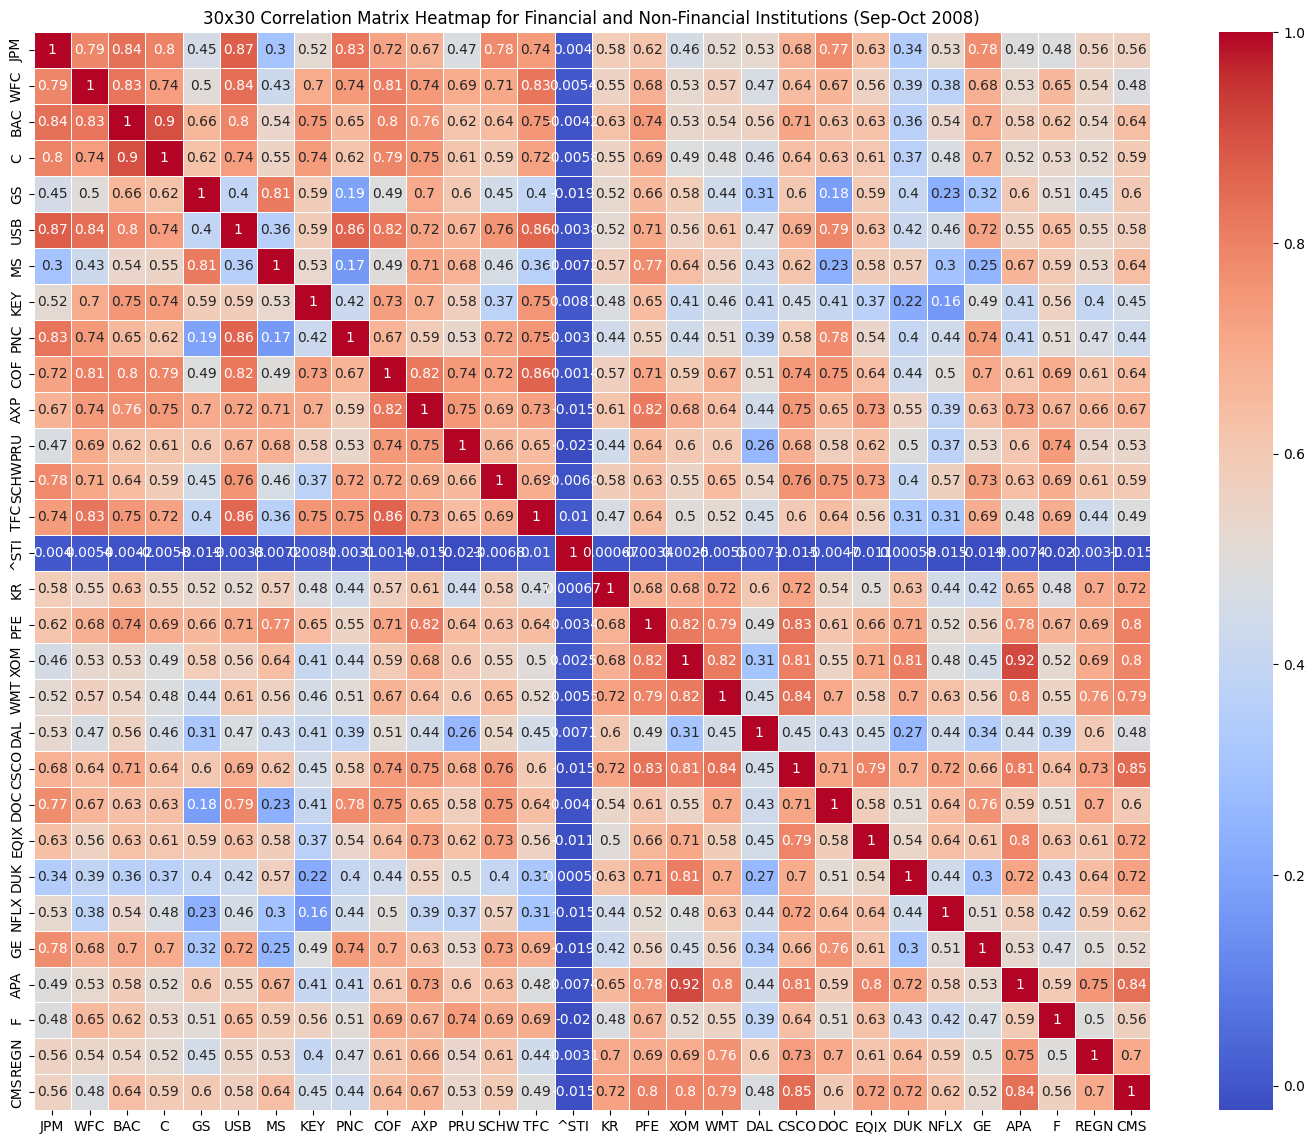

In [ ]:
# Import necessary library for heatmap visualization
import seaborn as sns

# Step 4: Correlation Matrix Computation and Visualization

# Calculate the 30x30 correlation matrix using daily returns from Step 3
correlation_matrix = data_combined_returns.corr()

# Display the correlation matrix
print("30x30 Correlation Matrix:")
print(correlation_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("30x30 Correlation Matrix Heatmap for Financial and Non-Financial Institutions (Sep-Oct 2008)")
plt.show()


# **Step 5: Collaborative Understanding of the Upper-Confidence Bound (UCB) Algorithm**



No deliverables required

# **Step 6: Developing and Implementing UCB Algorithm Pseudocode in Python**

Develope the pseudocode
a. Member A writes pseudocode that describes the UBC algorithm.




Implementing the pseudocode

b. Using A’s pseudocode, Member B implements those steps in Python. Note that member B is welcome to use Python packages.

c. Member C provides detailed comments of B’s code. Member C also applies B’s code to the data set.

Final Q-values (estimated returns) for each asset: [ 0.06013803 -0.01368469 -0.08687497  0.05183088  0.00484792 -0.00374676
  0.01539338  0.         -0.02559267 -0.04511859 -0.01875461 -0.01283954
  0.02657765 -0.00852063 -0.02803511 -0.00833337  0.02252322  0.
 -0.00965026 -0.10566299 -0.0408713  -0.02529336  0.03766915  0.01957032
  0.00966492  0.         -0.02071821 -0.10902258  0.00416648 -0.01260366]
Total rewards collected: -0.48817303615095486


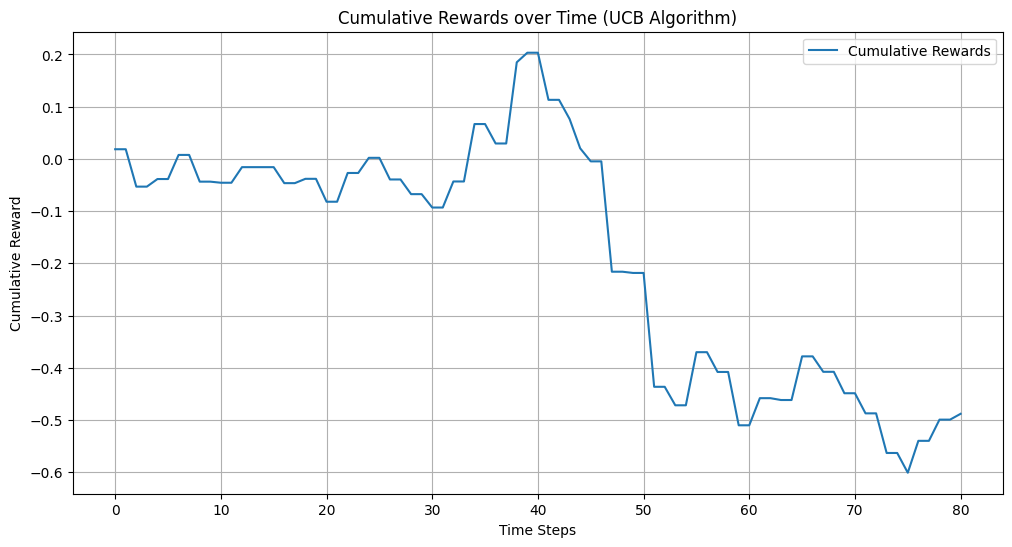

In [ ]:
# Import necessary libraries (assuming previous libraries are already imported)
import numpy as np

# Step 6: Implement the UCB Algorithm using daily returns data

# Set parameters for UCB
c = 2.0  # Exploration factor to balance exploration and exploitation
num_assets = data_combined_returns.shape[1]  # Number of assets being analyzed
num_steps = len(data_combined_returns)  # Total number of time steps based on the dataset

# Initialize variables for UCB algorithm
Q_values = np.zeros(num_assets)  # Estimated values for each asset (mean return)
N_counts = np.zeros(num_assets)  # Count of selections for each asset to track how often they are chosen
reward_history = []  # Stores the rewards received at each time step for analysis
selected_assets = []  # List to track which assets are selected at each time step

# Main loop to iterate through each time step
for t in range(1, num_steps):
    UCB_scores = np.zeros(num_assets)  # Array to store UCB scores for each asset

    # Calculate UCB score for each asset
    for a in range(num_assets):
        if N_counts[a] == 0:
            UCB_scores[a] = float('inf')  # Assign infinity to ensure the asset is selected at least once
        else:
            # Calculate the UCB score using the formula: Q(a) + c * sqrt(ln(t) / N(a))
            UCB_scores[a] = Q_values[a] + c * np.sqrt(np.log(t) / N_counts[a])

    # Select the asset with the highest UCB score
    selected_asset = np.argmax(UCB_scores)  # Identify the index of the asset with the highest UCB score

    # Retrieve the reward (daily return) for the selected asset at the current time step
    reward = data_combined_returns.iloc[t, selected_asset]  # Fetch the return for the chosen asset

    # Update the selection count for the chosen asset
    N_counts[selected_asset] += 1

    # Update the estimated Q-value for the chosen asset using the formula: Q(a) = Q(a) + (1/N(a)) * (R - Q(a))
    Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]

    # Record the reward received at this time step
    reward_history.append(reward)
    # Record which asset was selected
    selected_assets.append(selected_asset)

# Display the final estimated Q-values for each asset
print("Final Q-values (estimated returns) for each asset:", Q_values)
# Display the total rewards accumulated during the analysis period
print("Total rewards collected:", sum(reward_history))

# Plot the cumulative rewards over time to visualize the performance of the UCB algorithm
cumulative_rewards = np.cumsum(reward_history)  # Calculate cumulative sum of rewards
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards, label="Cumulative Rewards")  # Plot the cumulative rewards
plt.title("Cumulative Rewards over Time (UCB Algorithm)")  # Set the title for the plot
plt.xlabel("Time Steps")  # Label for the x-axis
plt.ylabel("Cumulative Reward")  # Label for the y-axis
plt.legend()  # Display the legend
plt.grid(True)  # Add grid lines for better visualization
plt.show()  # Display the plot


step 6 using different c


Results for c = 0.1
Final Q-values (estimated returns) for each asset: [-0.00721013  0.02665158 -0.07160151  0.          0.00484792 -0.00504361
  0.04179421  0.00165504 -0.03120766 -0.02009396  0.03151788  0.
 -0.00714168 -0.00774126 -0.01239302 -0.01432895 -0.01530624 -0.0142431
 -0.00593656 -0.0061296  -0.01742291  0.03641057  0.00980817 -0.0525694
  0.01681804 -0.00495981 -0.02071821 -0.02163465 -0.0696332   0.        ]
Total accumulated rewards: -0.11451133636596

Results for c = 0.5
Final Q-values (estimated returns) for each asset: [ 0.06013803 -0.01368469 -0.08687497  0.05183088  0.00484792 -0.00374676
  0.01539338  0.         -0.02559267 -0.04511859 -0.01875461 -0.01283954
  0.02657765 -0.00852063 -0.02803511 -0.00833337  0.02252322  0.
 -0.00965026 -0.10566299 -0.0408713  -0.02529336  0.03766915  0.01957032
  0.00966492  0.         -0.02071821 -0.10902258  0.00416648 -0.01260366]
Total accumulated rewards: -0.48817303615095486

Results for c = 1
Final Q-values (estimated retu

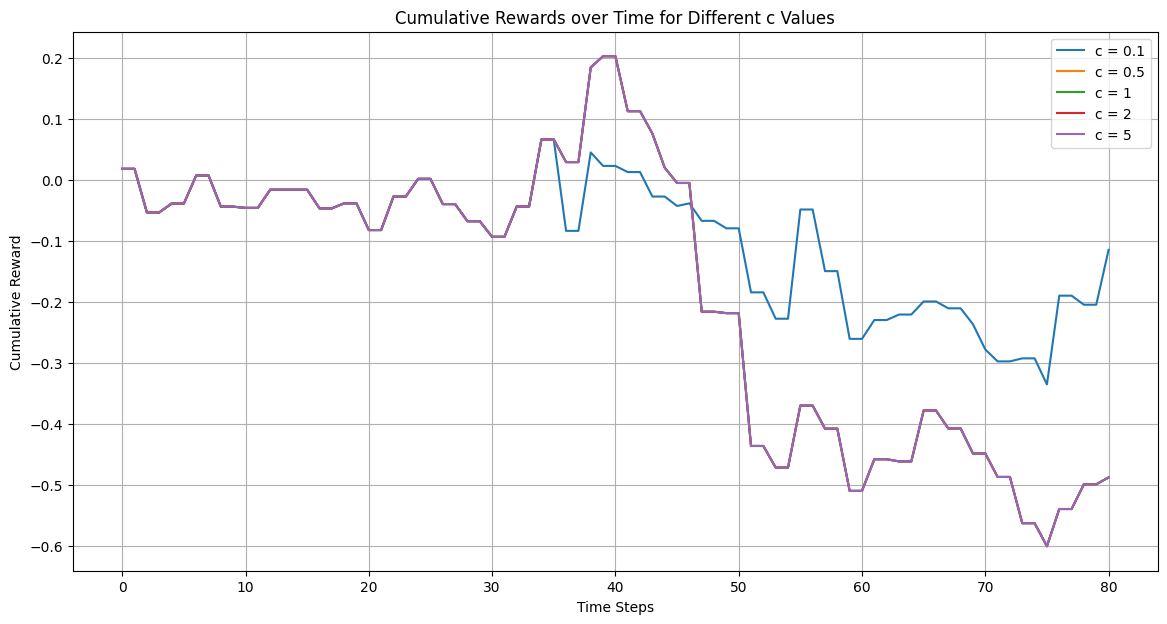

In [ ]:
# Import necessary libraries (assuming previous libraries are already imported)
import numpy as np
import matplotlib.pyplot as plt

# Function to implement the UCB algorithm
def ucb_algorithm(data, c):
    num_assets = data.shape[1]  # Number of assets
    Q_values = np.zeros(num_assets)  # Estimated returns for each asset
    N_counts = np.zeros(num_assets)  # Count of selections for each asset
    reward_history = []

    num_steps = len(data)
    for t in range(1, num_steps):
        UCB_scores = np.zeros(num_assets)

        for a in range(num_assets):
            if N_counts[a] == 0:
                UCB_scores[a] = float('inf')
            else:
                UCB_scores[a] = Q_values[a] + c * np.sqrt(np.log(t) / N_counts[a])

        selected_asset = np.argmax(UCB_scores)
        reward = data.iloc[t, selected_asset]
        N_counts[selected_asset] += 1
        Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
        reward_history.append(reward)

    return Q_values, reward_history

# Run the UCB algorithm for different c values
c_values = [0.1, 0.5, 1, 2, 5]
#c_values = [2]
plt.figure(figsize=(14, 7))

for c in c_values:
    Q_values, reward_history = ucb_algorithm(data_combined_returns, c)
    cumulative_rewards = np.cumsum(reward_history)

    print(f"\nResults for c = {c}")
    print("Final Q-values (estimated returns) for each asset:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    # Plot cumulative rewards
    plt.plot(cumulative_rewards, label=f"c = {c}")

plt.title("Cumulative Rewards over Time for Different c Values")
plt.xlabel("Time Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()

# **Step 7: Collaborative Discussion on Epsilon-Greedy Algorithm for Portfolio Selection**

No deliverables required

# **Step 8: Pseudocode and Python Implementation of the Epsilon-Greedy Algorithm**


Results for epsilon = 0.01
Final Q-values (estimated returns) for each asset: [-0.00895433 -0.00021935  0.00648678  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
Total accumulated rewards: 0.15116382648589444

Results for epsilon = 0.05
Final Q-values (estimated returns) for each asset: [-0.00895433  0.00190986  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.0055227   0.          0.          0.         -0.01917842
  0.         -0.01464652  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
Total accumulated rewards: 0.03796797217412229

Results for epsilon = 0.1
Final Q-values (estimated returns) for each a

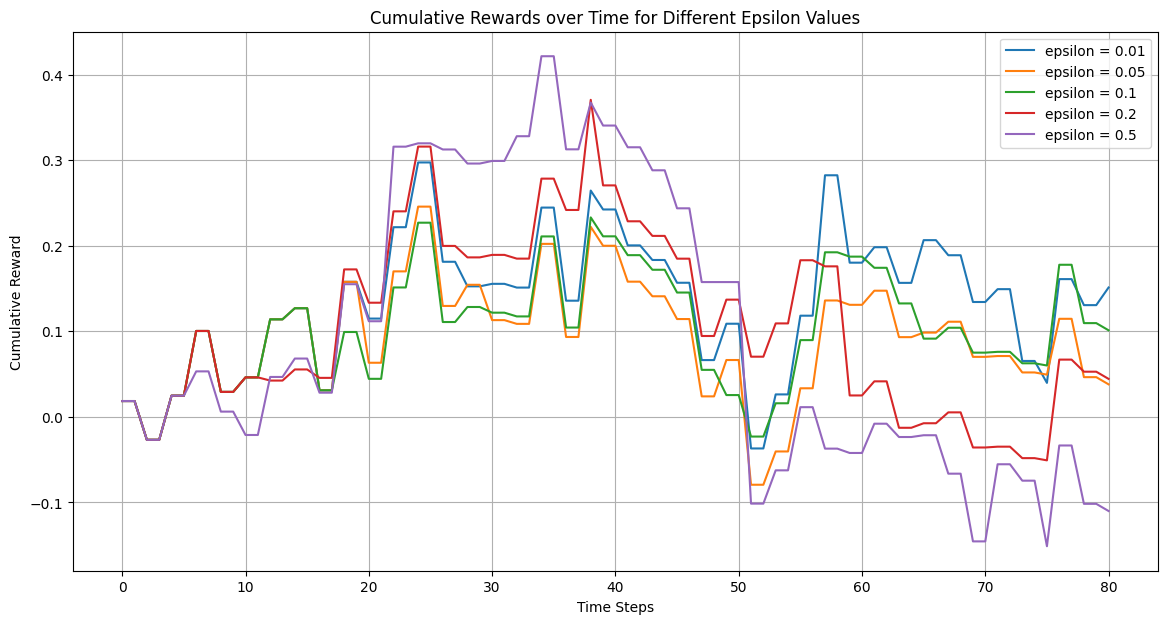

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset prepared in Step 3
# Assuming 'data_combined_returns' holds the daily returns for each asset

def epsilon_greedy_algorithm(data, epsilon):
    # Initialize parameters
    num_assets = data.shape[1]  # Number of assets
    Q_values = np.zeros(num_assets)  # Estimated returns for each asset
    N_counts = np.zeros(num_assets)  # Count of selections for each asset
    reward_history = []  # List to track the reward history

    # Main loop over time steps
    num_steps = len(data)
    for t in range(1, num_steps):
        # Generate random number for exploration decision
        r = np.random.rand()

        if r < epsilon:
            # Exploration: select a random asset
            selected_asset = np.random.randint(0, num_assets)
        else:
            # Exploitation: select the asset with the highest Q_value
            selected_asset = np.argmax(Q_values)

        # Retrieve the reward for the selected asset at time t
        reward = data.iloc[t, selected_asset]

        # Update the selection count for the chosen asset
        N_counts[selected_asset] += 1

        # Update Q_value for the chosen asset
        Q_values[selected_asset] += (1 / N_counts[selected_asset]) * (reward - Q_values[selected_asset])

        # Append the reward to the reward history
        reward_history.append(reward)

    # Return results
    return Q_values, reward_history

# Run the epsilon-greedy algorithm for different epsilon values
epsilon_values = [0.01,0.05,0.1,0.2,0.5]
#epsilon_values = [0.2]
results = {}
plt.figure(figsize=(14, 7))

for epsilon in epsilon_values:
    Q_values, reward_history = epsilon_greedy_algorithm(data_combined_returns, epsilon)
    cumulative_rewards = np.cumsum(reward_history)
    results[epsilon] = (Q_values, cumulative_rewards)

    # Print the final Q-values and total rewards
    print(f"\nResults for epsilon = {epsilon}")
    print("Final Q-values (estimated returns) for each asset:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    # Plot the cumulative rewards on the same graph
    plt.plot(cumulative_rewards, label=f"epsilon = {epsilon}")

plt.title("Cumulative Rewards over Time for Different Epsilon Values")
plt.xlabel("Time Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()

Epsilon


Running experiment with epsilon = 0.1


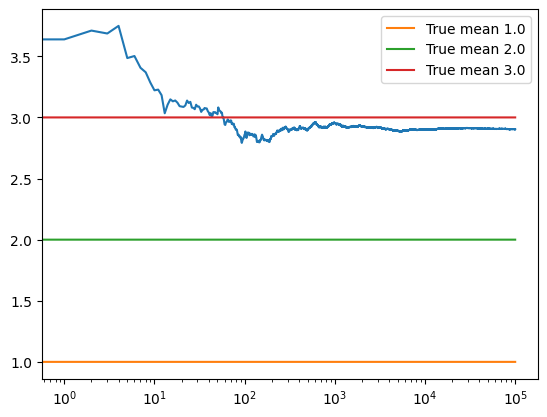

Final estimated mean for action 1: 1.0131
Final estimated mean for action 2: 1.9839
Final estimated mean for action 3: 3.0035

Running experiment with epsilon = 0.05


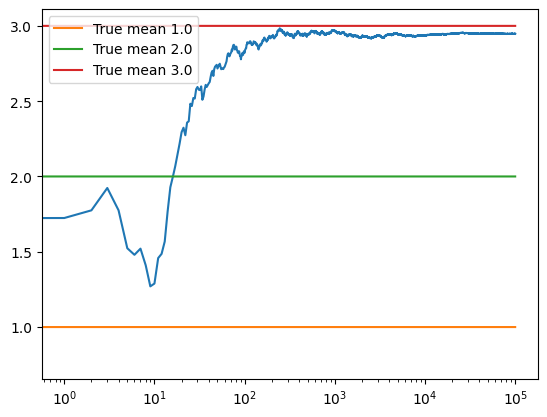

Final estimated mean for action 1: 0.9829
Final estimated mean for action 2: 1.9914
Final estimated mean for action 3: 2.9990

Running experiment with epsilon = 0.01


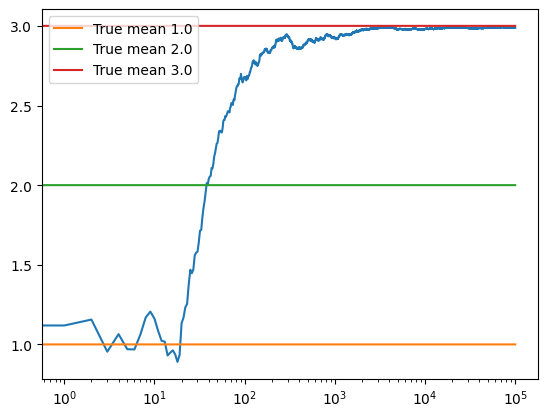

Final estimated mean for action 1: 1.0054
Final estimated mean for action 2: 2.0810
Final estimated mean for action 3: 2.9982


In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define Action class
class Actions:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0

    # Choose a random action
    def choose(self):
        return np.random.randn() + self.m

    # Update the action-value estimate
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0 / self.N) * self.mean + (1.0 / self.N) * x

# Run experiment function
def run_experiment(m1, m2, m3, eps, N):
    actions = [Actions(m1), Actions(m2), Actions(m3)]
    data = np.empty(N)

    for i in range(N):
        # epsilon-greedy choice
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([a.mean for a in actions])
        x = actions[j].choose()
        actions[j].update(x)

        # For plotting
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # Plot moving average CTR
    plt.plot(cumulative_average)
    plt.plot(np.ones(N) * m1, label=f"True mean {m1}")
    plt.plot(np.ones(N) * m2, label=f"True mean {m2}")
    plt.plot(np.ones(N) * m3, label=f"True mean {m3}")
    plt.xscale('log')
    plt.legend()
    plt.show()

    # Print final estimated means
    for idx, a in enumerate(actions):
        print(f"Final estimated mean for action {idx + 1}: {a.mean:.4f}")

    return cumulative_average

# Main execution
if __name__ == '__main__':
    print("Running experiment with epsilon = 0.1")
    c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

    print("\nRunning experiment with epsilon = 0.05")
    c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)

    print("\nRunning experiment with epsilon = 0.01")
    c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)


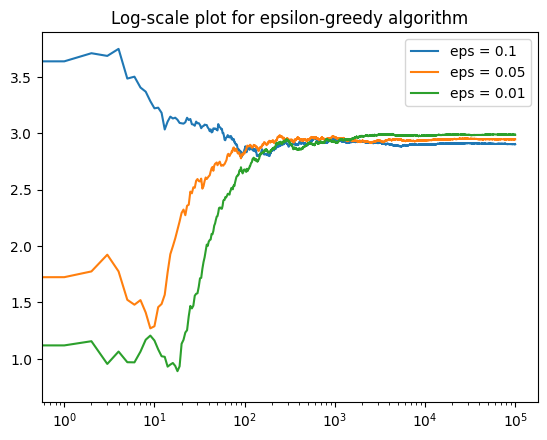

In [ ]:
# log scale plot
plt.plot(c_1, label ='eps = 0.1')
plt.plot(c_05, label ='eps = 0.05')
plt.plot(c_01, label ='eps = 0.01')
plt.legend()
plt.title("Log-scale plot for epsilon-greedy algorithm")
plt.xscale('log')
plt.show()

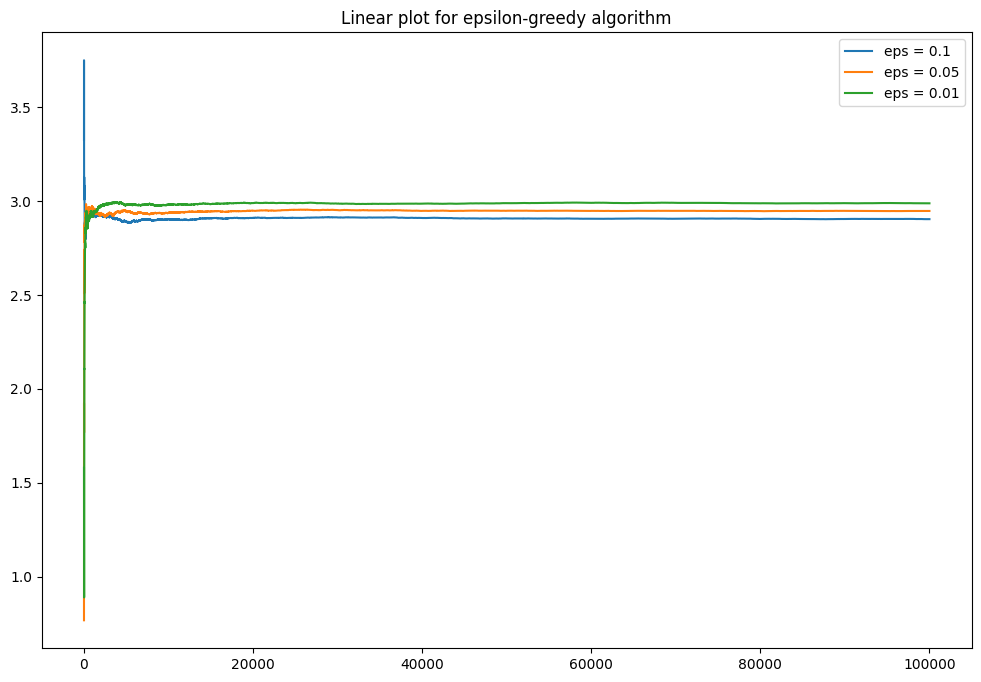

In [ ]:
# linear plot
plt.figure(figsize = (12, 8))
plt.plot(c_1, label ='eps = 0.1')
plt.plot(c_05, label ='eps = 0.05')
plt.plot(c_01, label ='eps = 0.01')
plt.legend()
plt.title("Linear plot for epsilon-greedy algorithm")
plt.show()

[*********************100%***********************]  1 of 1 completed


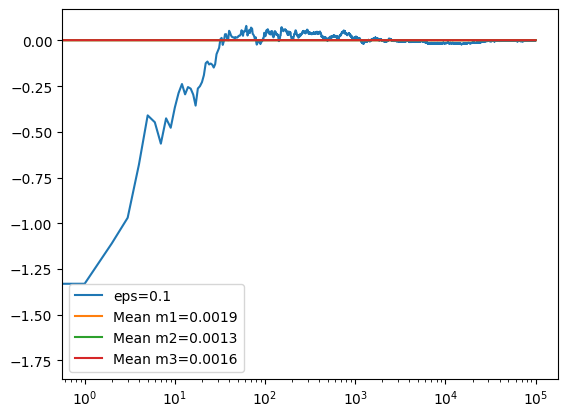

Final estimated mean: 0.004041565144553345
Final estimated mean: -0.010640158629187485
Final estimated mean: -0.008834692248067854


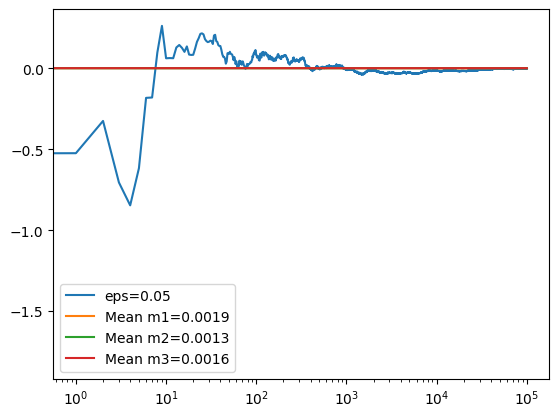

Final estimated mean: -0.004712839972321432
Final estimated mean: -0.005269651920907604
Final estimated mean: 0.0013693674404622314


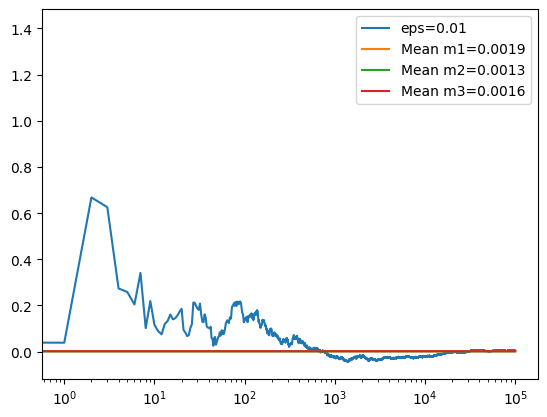

Final estimated mean: -0.006751526833698428
Final estimated mean: -0.06307215847761821
Final estimated mean: 0.0034566972360582774


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Load AMZN stock data
data = yf.download('AMZN', start='2009-01-01', end='2024-01-01')
data['Daily Return'] = data['Adj Close'].pct_change()

# Calculate means for different market conditions (these are hypothetical and can be adjusted)
m1 = data['Daily Return'][:1000].mean()  # Mean of first 1000 days
m2 = data['Daily Return'][1000:2000].mean()  # Mean of next 1000 days
m3 = data['Daily Return'][2000:3000].mean()  # Mean of the following 1000 days

# Define Action class
class Actions:
    def __init__(self, m):
        self.m = m  # Mean based on market condition
        self.mean = 0
        self.N = 0

    def choose(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x

# Experiment function using real data-driven means
def run_experiment(m1, m2, m3, eps, N):
    actions = [Actions(m1), Actions(m2), Actions(m3)]
    data = np.empty(N)

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([a.mean for a in actions])
        x = actions[j].choose()
        actions[j].update(x)

        # For plotting
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # Plot cumulative average return
    plt.plot(cumulative_average, label=f'eps={eps}')
    plt.plot(np.ones(N) * m1, label=f'Mean m1={m1:.4f}')
    plt.plot(np.ones(N) * m2, label=f'Mean m2={m2:.4f}')
    plt.plot(np.ones(N) * m3, label=f'Mean m3={m3:.4f}')
    plt.xscale('log')
    plt.legend()
    plt.show()

    for a in actions:
        print(f'Final estimated mean: {a.mean}')

    return cumulative_average

# Run experiments with different epsilon values
if __name__ == '__main__':
    c_1 = run_experiment(m1, m2, m3, 0.1, 100000)
    c_05 = run_experiment(m1, m2, m3, 0.05, 100000)
    c_01 = run_experiment(m1, m2, m3, 0.01, 100000)


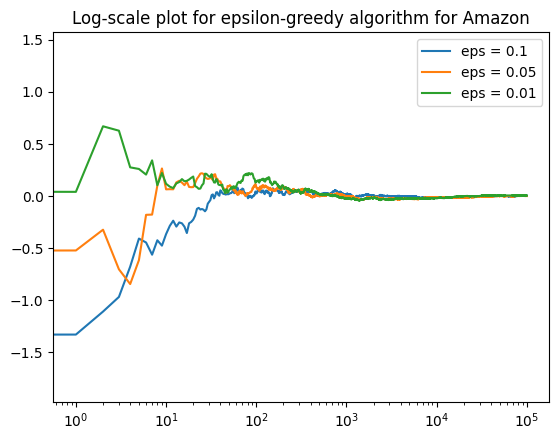

In [ ]:
# log scale plot
plt.plot(c_1, label ='eps = 0.1')
plt.plot(c_05, label ='eps = 0.05')
plt.plot(c_01, label ='eps = 0.01')
plt.legend()
plt.title("Log-scale plot for epsilon-greedy algorithm for Amazon")
plt.xscale('log')
plt.show()

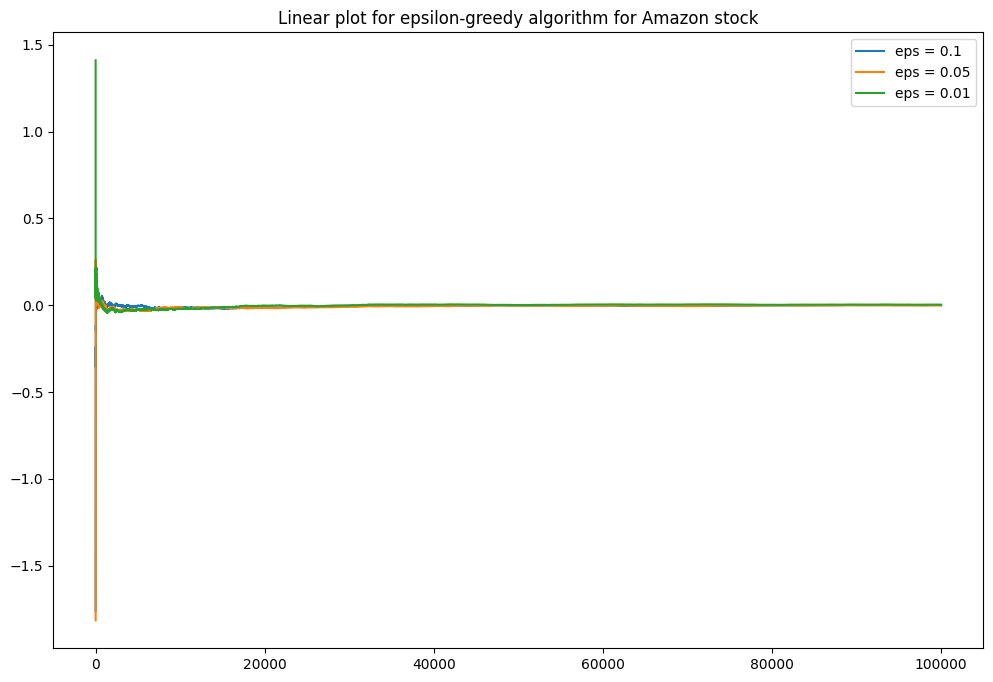

In [ ]:
# linear plot
plt.figure(figsize = (12, 8))
plt.plot(c_1, label ='eps = 0.1')
plt.plot(c_05, label ='eps = 0.05')
plt.plot(c_01, label ='eps = 0.01')
plt.legend()
plt.title("Linear plot for epsilon-greedy algorithm for Amazon stock")
plt.show()

# **Step 9: Comparative Analysis of Results: UCB vs. Epsilon-Greedy and Huo’s Paper**


**Results from Huo and Fu**

From their study (Huo and Fu), the Monte Carlo simulation was used to evaluate the performance of a sequential portfolio selection algorithm that incorporated the Upper Confidence Bound (UCB) algorithm, specifically the UCB1 policy, as an exploration-focused component.
The UCB1 portfolio was compared against four benchmarks: a risk-aware portfolio, an ε-greedy portfolio, an equally weighted portfolio, and a combined portfolio that balanced the UCB1 and risk-aware portfolios.
The results showed that the UCB1 portfolio consistently achieved the highest cumulative wealth, outperforming all other benchmarks. Regardless, there was high variability in the performance of the UCB1 portfolio. In volatile markets, the UCB1 policy seemed to have taken a longer time to reach optimality.


# **Step 10: Updating Data Series for Financial and Non-Financial Companies**

Data for JPM retrieved successfully.
Data for WFC retrieved successfully.
Data for BAC retrieved successfully.
Data for C retrieved successfully.
Data for GS retrieved successfully.
Data for USB retrieved successfully.
Data for MS retrieved successfully.
Data for KEY retrieved successfully.
Data for PNC retrieved successfully.
Data for COF retrieved successfully.
Data for AXP retrieved successfully.
Data for PRU retrieved successfully.
Data for SCHW retrieved successfully.
Data for TFC retrieved successfully.
Data for ^STI retrieved successfully.
Data for KR retrieved successfully.
Data for PFE retrieved successfully.
Data for XOM retrieved successfully.
Data for WMT retrieved successfully.
Data for DAL retrieved successfully.
Data for CSCO retrieved successfully.
Data for DOC retrieved successfully.
Data for EQIX retrieved successfully.
Data for DUK retrieved successfully.
Data for NFLX retrieved successfully.
Data for GE retrieved successfully.
Data for APA retrieved successfully.
Da

<ipython-input-12-0099c9bccdb2>:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_combined_returns_updated = data_combined_updated.pct_change().dropna()


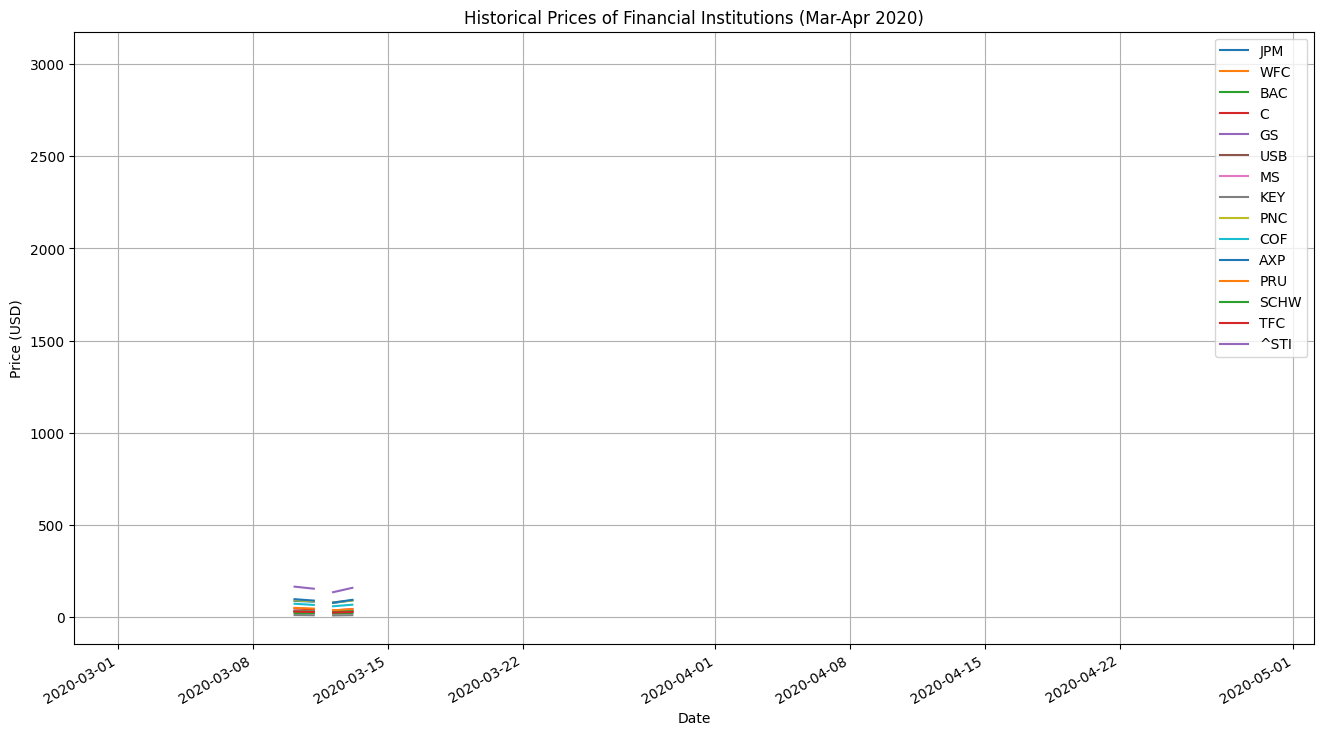

<ipython-input-12-0099c9bccdb2>:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  financial_data_returns_updated = financial_data_updated.pct_change().dropna()


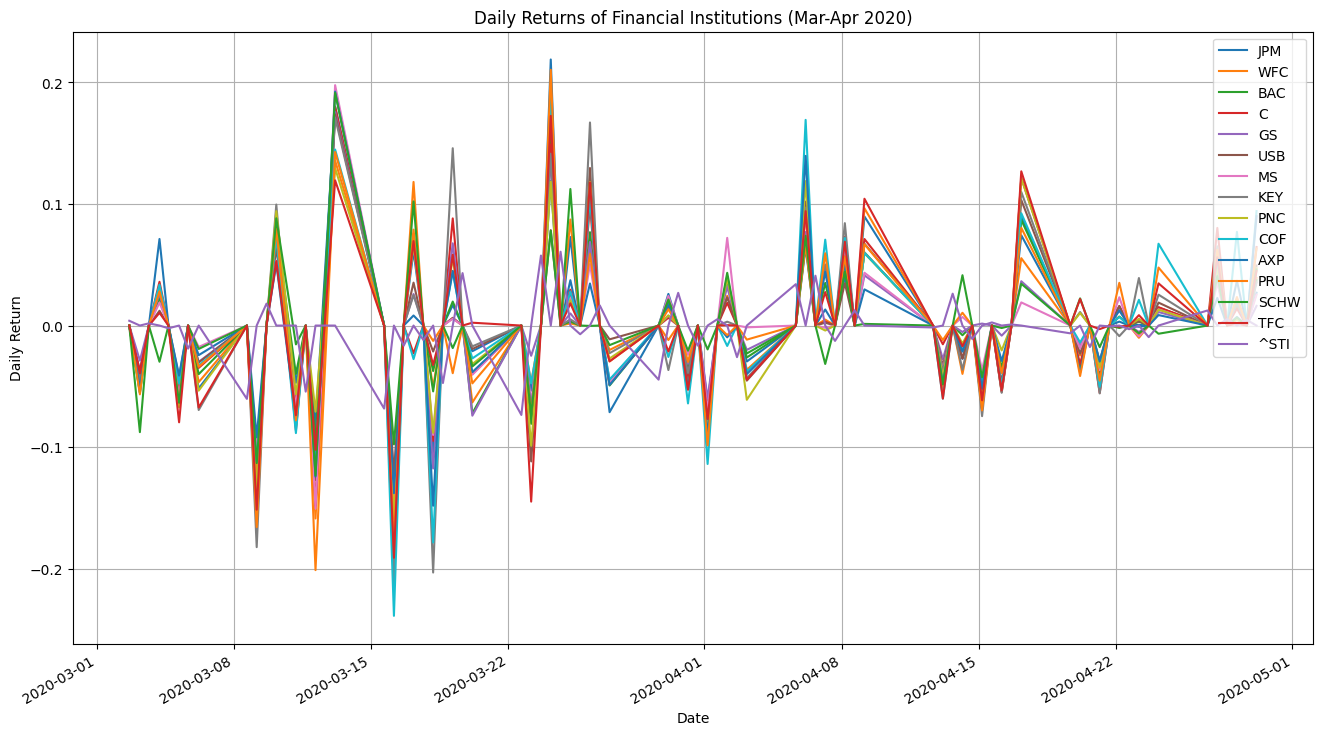

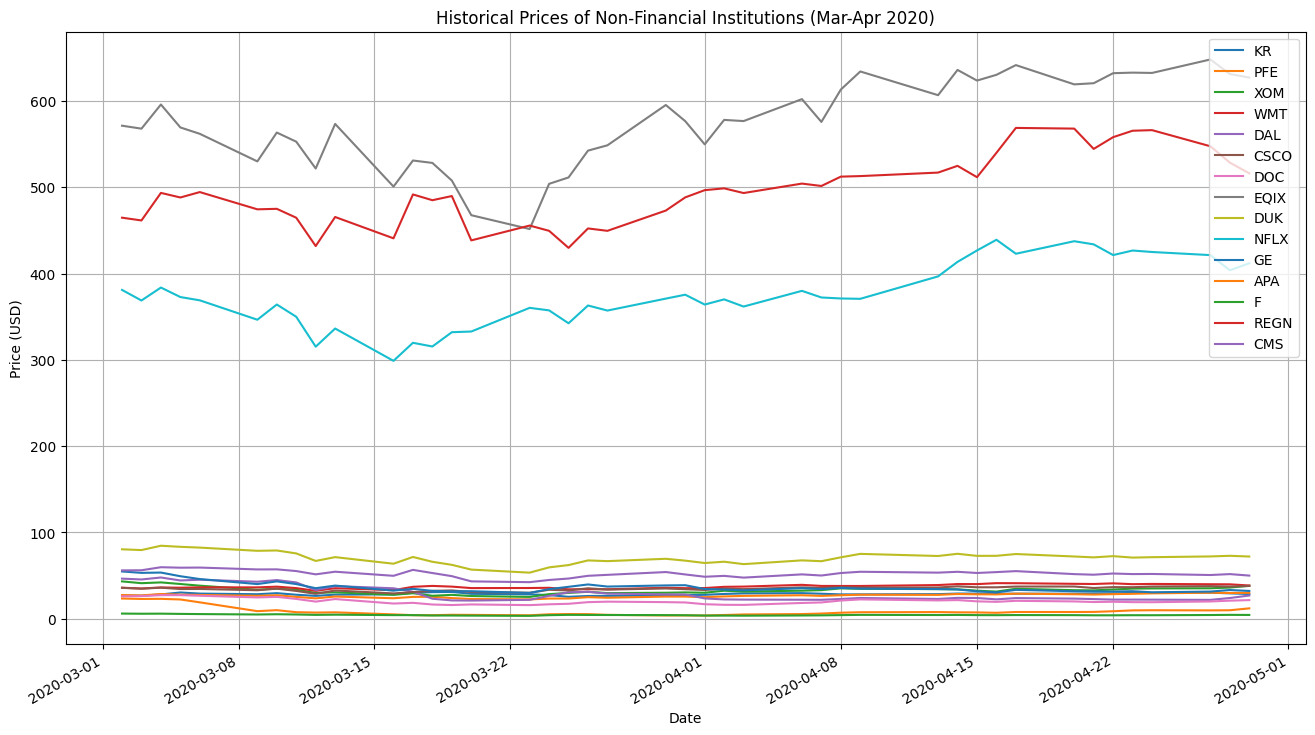

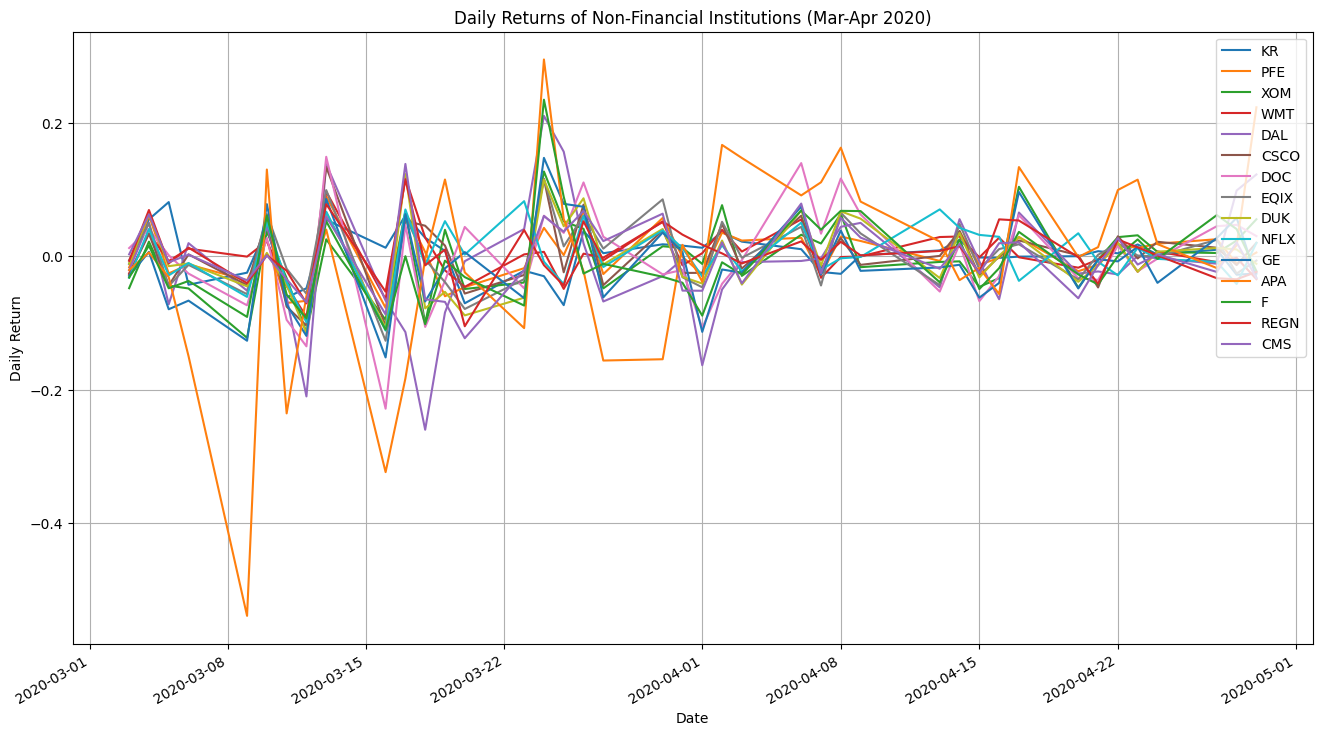


Table of updated daily returns:
                                JPM       WFC       BAC         C        GS  \
Date                                                                          
2020-03-02 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-03-03 05:00:00+00:00 -0.037525 -0.040936 -0.055158 -0.037580 -0.028835   
2020-03-03 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-03-04 05:00:00+00:00  0.024709  0.021465  0.023063  0.035972  0.026102   
2020-03-04 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
...                             ...       ...       ...       ...       ...   
2020-04-27 04:00:00+00:00  0.043104  0.055349  0.058160  0.080278  0.036949   
2020-04-27 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-04-28 04:00:00+00:00  0.007081  0.016191  0.017895  0.013961  0.018906   
2020-04-28 16:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-04-29 04:00:00

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 10: Define the updated date range for March to April 2020
start_date_update = '2020-03-01'
end_date_update = '2020-04-30'

# Define the lists of financial and non-financial institutions
financial_institutions = ["JPM", "WFC", "BAC", "C", "GS", "USB", "MS", "KEY", "PNC", "COF", "AXP", "PRU", "SCHW", "TFC", "^STI"]
non_financial_institutions = ["KR", "PFE", "XOM", "WMT", "DAL", "CSCO", "DOC", "EQIX", "DUK", "NFLX", "GE", "APA", "F", "REGN", "CMS"]

# Function to get historical data from Yahoo Finance
def get_historical_data(symbols, start, end):
    data_dict = {}
    for symbol in symbols:
        try:
            stock_data = yf.Ticker(symbol).history(start=start, end=end)
            if not stock_data.empty:
                data_dict[symbol] = stock_data['Close']  # Collect only the closing prices
                print(f"Data for {symbol} retrieved successfully.")
            else:
                print(f"No data found for {symbol}.")
        except Exception as e:
            print(f"Error retrieving data for {symbol}: {e}")
    return pd.DataFrame(data_dict)

# Collect updated historical data for financial institutions (March-April 2020)
financial_data_updated = get_historical_data(financial_institutions, start_date_update, end_date_update)

# Collect updated historical data for non-financial institutions (March-April 2020)
non_financial_data_updated = get_historical_data(non_financial_institutions, start_date_update, end_date_update)

# Merge updated data into a unified time series
data_combined_updated = pd.concat([financial_data_updated, non_financial_data_updated], axis=1)

# Calculate daily returns for each company in the updated dataset
data_combined_returns_updated = data_combined_updated.pct_change().dropna()

# Save the updated data to CSV files for reporting purposes
data_combined_updated.to_csv("updated_historical_prices_combined.csv")
data_combined_returns_updated.to_csv("updated_daily_returns_combined.csv")

# Display a sample of the updated data
print("Sample of updated historical prices:")
print(data_combined_updated.head())

print("\nSample of updated daily returns:")
print(data_combined_returns_updated.head())

# Plot historical prices for financial institutions (March-April 2020)
financial_data_updated.plot(figsize=(16, 9), title="Historical Prices of Financial Institutions (Mar-Apr 2020)", grid=True)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(loc='upper right')
plt.show()

# Plot daily returns for financial institutions (March-April 2020)
financial_data_returns_updated = financial_data_updated.pct_change().dropna()
financial_data_returns_updated.plot(figsize=(16, 9), title="Daily Returns of Financial Institutions (Mar-Apr 2020)", grid=True)
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(loc='upper right')
plt.show()

# Plot historical prices for non-financial institutions (March-April 2020)
non_financial_data_updated.plot(figsize=(16, 9), title="Historical Prices of Non-Financial Institutions (Mar-Apr 2020)", grid=True)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend(loc='upper right')
plt.show()

# Plot daily returns for non-financial institutions (March-April 2020)
non_financial_data_returns_updated = non_financial_data_updated.pct_change().dropna()
non_financial_data_returns_updated.plot(figsize=(16, 9), title="Daily Returns of Non-Financial Institutions (Mar-Apr 2020)", grid=True)
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(loc='upper right')
plt.show()

# Display daily returns in a table format for reporting
print("\nTable of updated daily returns:")
print(data_combined_returns_updated)


# **Step 11: Re-evaluation of Algorithms with Updated Data and Parameter Adjustments**


Modify the UCB Algorithm for the Updated Dataset


Results for c = 0.1
Final Q-values (estimated returns) for each asset: [-0.01876228  0.01448677  0.00768768 -0.01056106 -0.02797867 -0.01979365
  0.00259337  0.         -0.13551588 -0.05692189  0.00983149 -0.07793865
 -0.00592149 -0.10219844 -0.00024555  0.00145067 -0.07734635 -0.0147278
  0.02382243  0.          0.02528417  0.02789551 -0.02904525 -0.00129556
  0.00080313  0.00466558 -0.10766056  0.01698511 -0.00405279  0.        ]
Total accumulated rewards: -0.3729478763369485

Results for c = 0.5
Final Q-values (estimated returns) for each asset: [ 0.01739637  0.          0.00768768  0.00213096 -0.03761829  0.00629306
 -0.00880488 -0.01946247 -0.06775794  0.          0.00409816 -0.0337108
 -0.00981553 -0.05109922  0.00174298  0.01452725 -0.03867318  0.00160077
  0.0221848   0.0378713   0.04080076  0.         -0.01934843  0.0229327
 -0.00688092  0.0191809  -0.0624936   0.01324503  0.01106746  0.        ]
Total accumulated rewards: -0.04304998106174851

Results for c = 1
Final Q-value

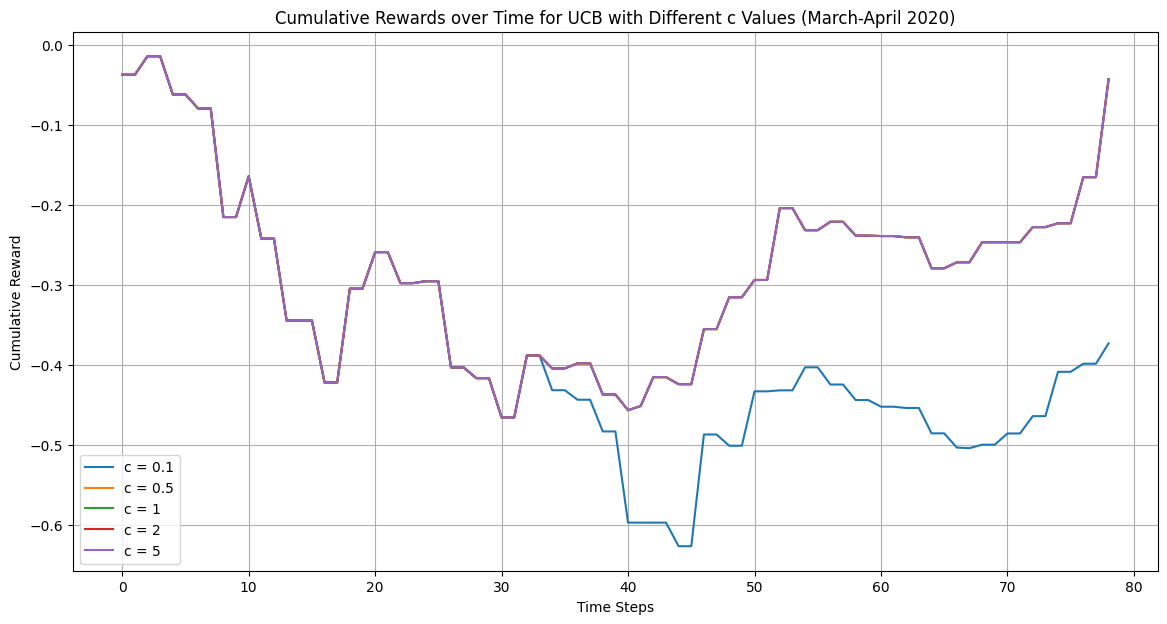

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to implement the UCB algorithm with Q-value calculation for updated dataset
def ucb_algorithm_with_q_values(data, c):
    num_assets = data.shape[1]  # Number of assets
    Q_values = np.zeros(num_assets)  # Estimated returns for each asset (Q-values)
    N_counts = np.zeros(num_assets)  # Count of selections for each asset
    reward_history = []  # Store the rewards for cumulative reward calculation

    num_steps = len(data)
    for t in range(1, num_steps):
        UCB_scores = np.zeros(num_assets)

        for a in range(num_assets):
            if N_counts[a] == 0:
                UCB_scores[a] = float('inf')
            else:
                UCB_scores[a] = Q_values[a] + c * np.sqrt(np.log(t) / N_counts[a])

        selected_asset = np.argmax(UCB_scores)  # Select asset with highest UCB score
        reward = data.iloc[t, selected_asset]  # Get the reward for the selected asset
        N_counts[selected_asset] += 1
        # Update Q-value for the selected asset using incremental formula
        Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
        reward_history.append(reward)

    return Q_values, reward_history

# Run the UCB algorithm with different c values
c_values = [0.1, 0.5, 1, 2, 5]
plt.figure(figsize=(14, 7))

for c in c_values:
    Q_values, reward_history = ucb_algorithm_with_q_values(data_combined_returns_updated, c)
    cumulative_rewards = np.cumsum(reward_history)

    print(f"\nResults for c = {c}")
    print("Final Q-values (estimated returns) for each asset:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    # Plot cumulative rewards
    plt.plot(cumulative_rewards, label=f"c = {c}")

plt.title("Cumulative Rewards over Time for UCB with Different c Values (March-April 2020)")
plt.xlabel("Time Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()


Modify the Epsilon-Greedy Algorithm for the Updated Dataset


Results for epsilon = 0.01
Final Q-values (estimated returns) for each asset: [-0.03752456 -0.00973022 -0.01997768 -0.08085835 -0.00027006 -0.06351841
  0.00790202  0.          0.          0.         -0.13785138  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
Total accumulated rewards: -0.03808632117119781

Results for epsilon = 0.05
Final Q-values (estimated returns) for each asset: [-0.03752456 -0.00501283 -0.07351212 -0.00140925 -0.123393   -0.00454876
  0.0086185   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.03143666  0.          0.          0.00484939]
Total accumulated rewards: 0.00043164139618456776

Results for epsilon = 0.1
Final Q-values (estimated returns

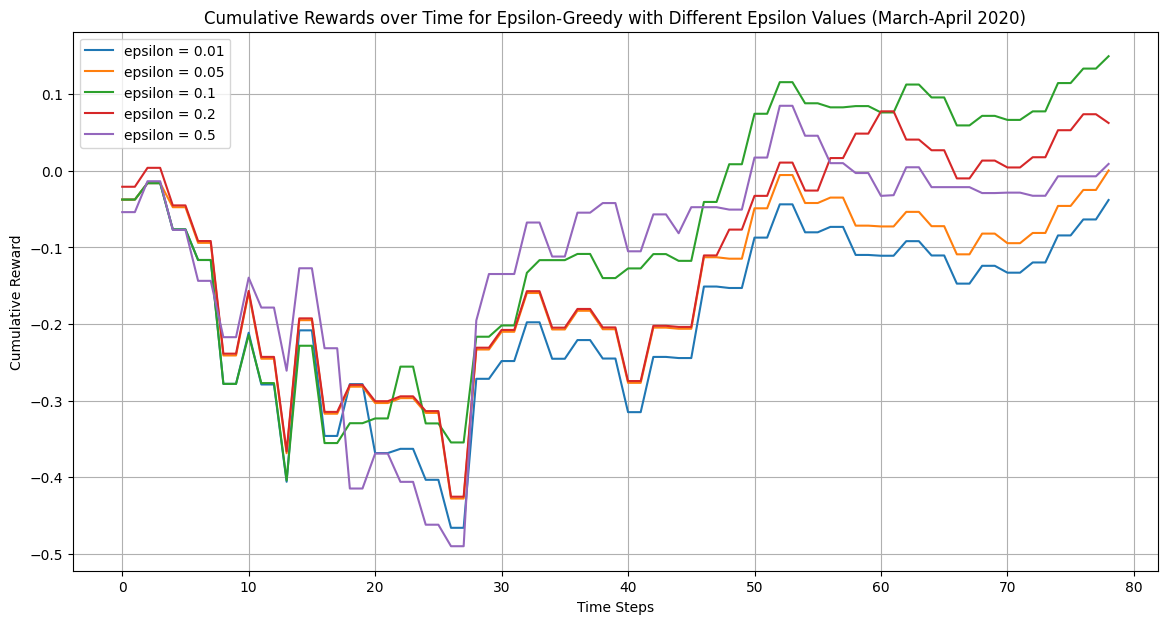

In [ ]:
# Function to implement the epsilon-greedy algorithm with Q-value calculation for updated dataset
def epsilon_greedy_algorithm_with_q_values(data, epsilon):
    num_assets = data.shape[1]  # Number of assets
    Q_values = np.zeros(num_assets)  # Estimated returns for each asset (Q-values)
    N_counts = np.zeros(num_assets)  # Count of selections for each asset
    reward_history = []  # Store rewards for cumulative reward calculation

    num_steps = len(data)
    for t in range(1, num_steps):
        if np.random.rand() < epsilon:  # Exploration
            selected_asset = np.random.randint(0, num_assets)
        else:  # Exploitation
            selected_asset = np.argmax(Q_values)

        reward = data.iloc[t, selected_asset]  # Get the reward for the selected asset
        N_counts[selected_asset] += 1
        # Update Q-value for the selected asset using incremental formula
        Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
        reward_history.append(reward)

    return Q_values, reward_history

# Run the epsilon-greedy algorithm with different epsilon values
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5]
plt.figure(figsize=(14, 7))

for epsilon in epsilon_values:
    Q_values, reward_history = epsilon_greedy_algorithm_with_q_values(data_combined_returns_updated, epsilon)
    cumulative_rewards = np.cumsum(reward_history)

    print(f"\nResults for epsilon = {epsilon}")
    print("Final Q-values (estimated returns) for each asset:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    # Plot cumulative rewards
    plt.plot(cumulative_rewards, label=f"epsilon = {epsilon}")

plt.title("Cumulative Rewards over Time for Epsilon-Greedy with Different Epsilon Values (March-April 2020)")
plt.xlabel("Time Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()


UCB with Holding Period


Results for holding period = 3 days
Final Q-values (estimated returns) for each asset: [-0.00427177 -0.02012876 -0.06232654 -0.00140925  0.01747    -0.0407007
 -0.00745092  0.0486111  -0.04353225  0.06251453  0.03580504 -0.00982008
  0.00024679 -0.0256161  -0.0086614   0.0035099   0.00056181 -0.00547328
  0.01942157 -0.00258082  0.00771087 -0.01104344  0.00696362 -0.00776442
 -0.00416728  0.0191809   0.2230551   0.          0.          0.        ]
Total accumulated rewards: 0.1242024662826885

Results for holding period = 5 days
Final Q-values (estimated returns) for each asset: [-0.01237533 -0.03416441  0.02389507 -0.04316142 -0.02480498 -0.00665882
  0.00523525 -0.0151064  -0.02196161  0.04795394  0.00675713 -0.01185322
  0.01094531 -0.00076227  0.00057664 -0.01340048  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
Total accumulated rewards: -0.4310275250039851

Results for hol

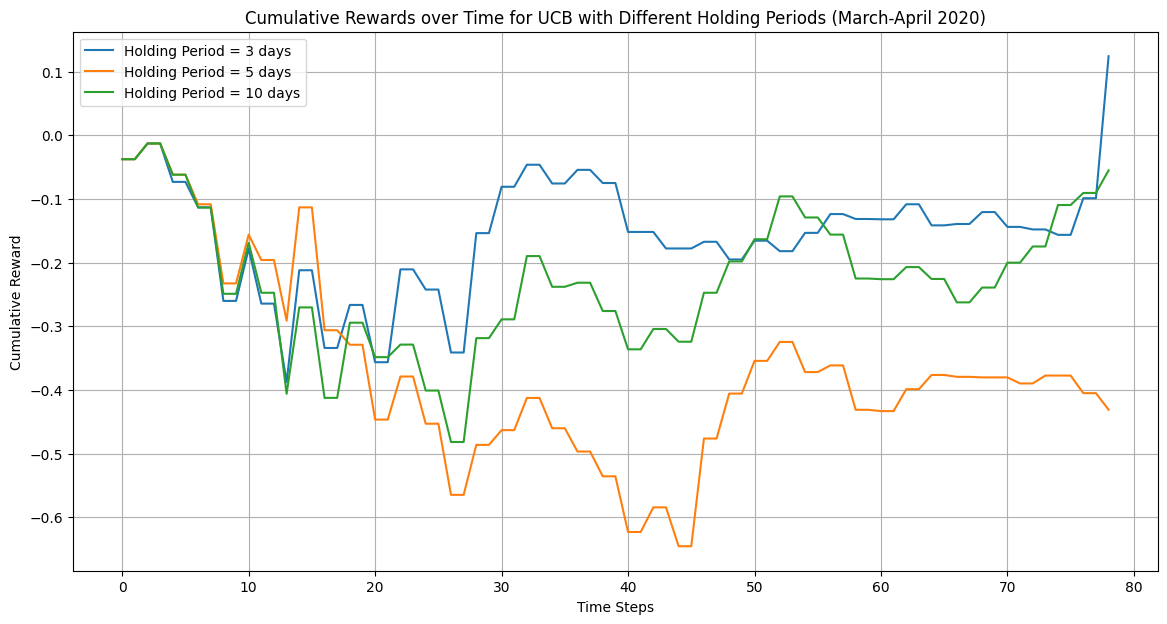

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to implement the UCB algorithm with a holding period
def ucb_with_holding_period(data, c, holding_period):
    num_assets = data.shape[1]  # Number of assets
    Q_values = np.zeros(num_assets)  # Estimated returns for each asset
    N_counts = np.zeros(num_assets)  # Count of selections for each asset
    reward_history = []  # To store rewards for cumulative calculation
    num_steps = len(data)

    for t in range(1, num_steps, holding_period):  # Step by holding period
        UCB_scores = np.zeros(num_assets)

        for a in range(num_assets):
            if N_counts[a] == 0:
                UCB_scores[a] = float('inf')
            else:
                UCB_scores[a] = Q_values[a] + c * np.sqrt(np.log(t) / N_counts[a])

        selected_asset = np.argmax(UCB_scores)

        # Hold the selected asset for the defined holding period
        for i in range(holding_period):
            if t + i < num_steps:
                reward = data.iloc[t + i, selected_asset]
                N_counts[selected_asset] += 1
                Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
                reward_history.append(reward)

    return Q_values, reward_history

# Run the UCB algorithm with different holding periods
c_value = 2.0  # Example UCB exploration constant
holding_periods = [3, 5, 10]
plt.figure(figsize=(14, 7))

for holding_period in holding_periods:
    Q_values, reward_history = ucb_with_holding_period(data_combined_returns_updated, c_value, holding_period)
    cumulative_rewards = np.cumsum(reward_history)

    print(f"\nResults for holding period = {holding_period} days")
    print("Final Q-values (estimated returns) for each asset:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    # Plot cumulative rewards
    plt.plot(cumulative_rewards, label=f"Holding Period = {holding_period} days")

plt.title("Cumulative Rewards over Time for UCB with Different Holding Periods (March-April 2020)")
plt.xlabel("Time Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()


Epsilon-Greedy with Holding Period


Results for holding period = 3 days
Final Q-values (estimated returns) for each asset: [-0.00427177 -0.02012876 -0.06232654 -0.00140925 -0.01244051 -0.0123012
  0.00872808  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00328835
  0.          0.          0.          0.          0.          0.        ]
Total accumulated rewards: -0.012221943826652315

Results for holding period = 5 days
Final Q-values (estimated returns) for each asset: [-0.01237533 -0.03416441 -0.00438298  0.00760169  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.0006247   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00843375  0.          0.        ]
Total accumulated rewards: -0.009261002840913135

Results for holding period = 10 days
Final

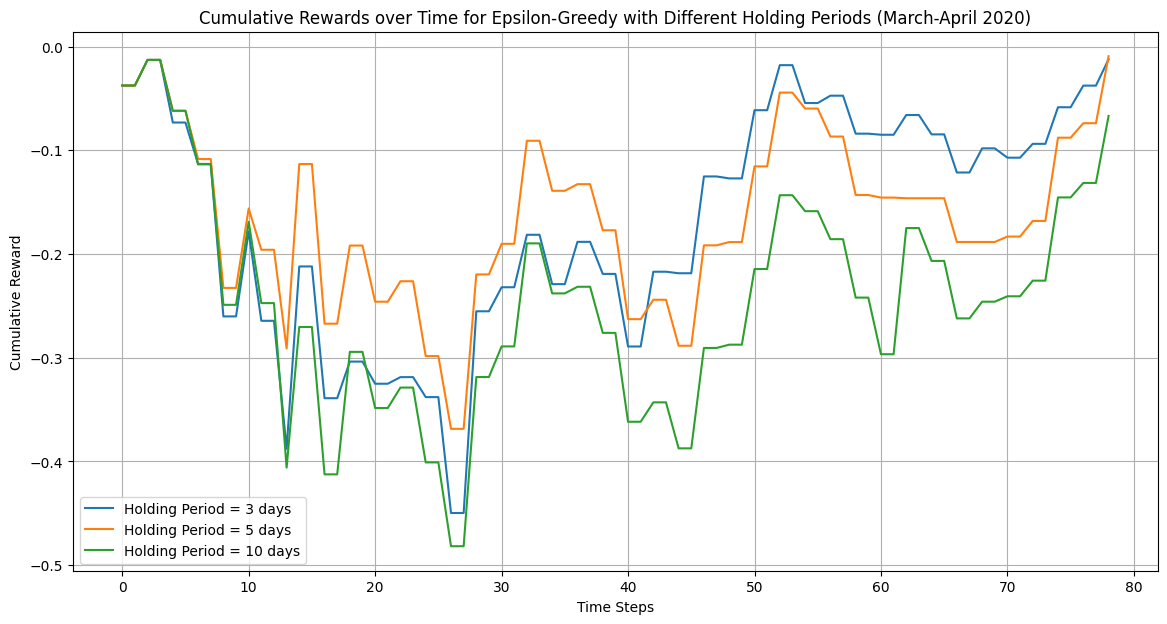

In [ ]:
# Function to implement the epsilon-greedy algorithm with a holding period
def epsilon_greedy_with_holding_period(data, epsilon, holding_period):
    num_assets = data.shape[1]  # Number of assets
    Q_values = np.zeros(num_assets)  # Estimated returns for each asset
    N_counts = np.zeros(num_assets)  # Count of selections for each asset
    reward_history = []  # To store rewards for cumulative calculation
    num_steps = len(data)

    for t in range(1, num_steps, holding_period):  # Step by holding period
        if np.random.rand() < epsilon:  # Exploration
            selected_asset = np.random.randint(0, num_assets)
        else:  # Exploitation
            selected_asset = np.argmax(Q_values)

        # Hold the selected asset for the defined holding period
        for i in range(holding_period):
            if t + i < num_steps:
                reward = data.iloc[t + i, selected_asset]
                N_counts[selected_asset] += 1
                Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
                reward_history.append(reward)

    return Q_values, reward_history

# Run the epsilon-greedy algorithm with different holding periods
epsilon_value = 0.1  # Example epsilon value for exploration
holding_periods = [3, 5, 10]
plt.figure(figsize=(14, 7))

for holding_period in holding_periods:
    Q_values, reward_history = epsilon_greedy_with_holding_period(data_combined_returns_updated, epsilon_value, holding_period)
    cumulative_rewards = np.cumsum(reward_history)

    print(f"\nResults for holding period = {holding_period} days")
    print("Final Q-values (estimated returns) for each asset:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    # Plot cumulative rewards
    plt.plot(cumulative_rewards, label=f"Holding Period = {holding_period} days")

plt.title("Cumulative Rewards over Time for Epsilon-Greedy with Different Holding Periods (March-April 2020)")
plt.xlabel("Time Steps")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid(True)
plt.show()


 Decaying Exploration Parameters

UCB with Decaying c - Final Q-values: [ 0.01739637  0.          0.00768768  0.00213096 -0.03761829  0.00629306
 -0.00880488 -0.01946247 -0.06775794  0.          0.00409816 -0.0337108
 -0.00981553 -0.05109922  0.00174298  0.01452725 -0.03867318  0.00160077
  0.0221848   0.0378713   0.04080076  0.         -0.01934843  0.0229327
 -0.00688092  0.0191809  -0.0624936   0.01324503  0.01106746  0.        ]
Total accumulated rewards: -0.04304998106174851


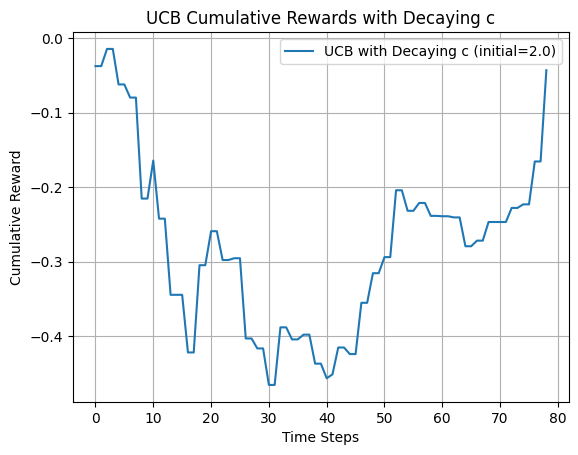

Epsilon-Greedy with Decaying epsilon - Final Q-values: [-0.03752456 -0.00973022 -0.01997768 -0.16171671 -0.00027006 -0.06351841
 -0.00141372 -0.03427624  0.00721166  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
Total accumulated rewards: -0.11506138395886423


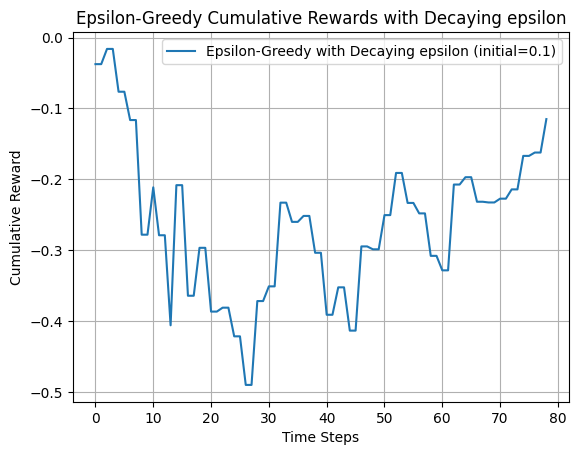

In [ ]:
# UCB with Decaying c
def ucb_with_decay(data, initial_c=2.0, decay_rate=0.99):
    num_assets = data.shape[1]
    Q_values = np.zeros(num_assets)
    N_counts = np.zeros(num_assets)
    reward_history = []

    num_steps = len(data)
    for t in range(1, num_steps):
        c = initial_c * (decay_rate ** t)  # Decaying exploration constant
        UCB_scores = np.zeros(num_assets)
        for a in range(num_assets):
            if N_counts[a] == 0:
                UCB_scores[a] = float('inf')
            else:
                UCB_scores[a] = Q_values[a] + c * np.sqrt(np.log(t) / N_counts[a])

        selected_asset = np.argmax(UCB_scores)
        reward = data.iloc[t, selected_asset]
        N_counts[selected_asset] += 1
        Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
        reward_history.append(reward)

    cumulative_rewards = np.cumsum(reward_history)
    print("UCB with Decaying c - Final Q-values:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    plt.plot(cumulative_rewards, label=f"UCB with Decaying c (initial={initial_c})")
    plt.title("UCB Cumulative Rewards with Decaying c")
    plt.xlabel("Time Steps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# Epsilon-Greedy with Decaying epsilon
def epsilon_greedy_with_decay(data, initial_epsilon=0.1, decay_rate=0.99):
    num_assets = data.shape[1]
    Q_values = np.zeros(num_assets)
    N_counts = np.zeros(num_assets)
    reward_history = []

    num_steps = len(data)
    for t in range(1, num_steps):
        epsilon = initial_epsilon * (decay_rate ** t)
        if np.random.rand() < epsilon:
            selected_asset = np.random.randint(0, num_assets)
        else:
            selected_asset = np.argmax(Q_values)

        reward = data.iloc[t, selected_asset]
        N_counts[selected_asset] += 1
        Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
        reward_history.append(reward)

    cumulative_rewards = np.cumsum(reward_history)
    print("Epsilon-Greedy with Decaying epsilon - Final Q-values:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    plt.plot(cumulative_rewards, label=f"Epsilon-Greedy with Decaying epsilon (initial={initial_epsilon})")
    plt.title("Epsilon-Greedy Cumulative Rewards with Decaying epsilon")
    plt.xlabel("Time Steps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run both decaying exploration versions
ucb_with_decay(data_combined_returns_updated)
epsilon_greedy_with_decay(data_combined_returns_updated)


 Incorporating Reward Smoothing (Moving Average)

UCB with Moving Average Smoothing - Final Q-values: [ 0.00439101  0.00715588  0.00424788  0.01013458 -0.01516933 -0.02902835
 -0.00041141 -0.02773475 -0.00324589 -0.01255521 -0.00999357 -0.00708664
  0.00374281 -0.03055733 -0.00848568  0.00879868  0.00560826 -0.00302996
  0.01019021 -0.03432837  0.00421098 -0.01623108 -0.01665296 -0.01483796
  0.01024306  0.00441884  0.01974438  0.02439932 -0.00570531  0.00992344]
Total accumulated rewards: -0.09418490003751712


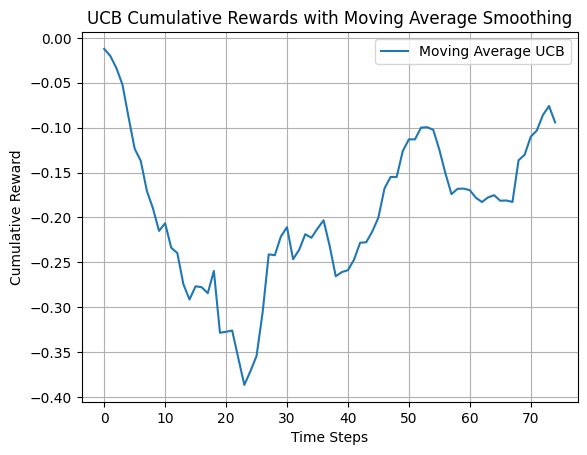

Epsilon-Greedy with Moving Average Smoothing - Final Q-values: [-0.01237533 -0.00778418 -0.01351667 -0.01760357 -0.03629254 -0.03495688
 -0.01360099 -0.0333018  -0.01958011 -0.00332988 -0.01394103 -0.04784874
 -0.00100006 -0.02849425 -0.00319288 -0.00139204  0.00618909  0.
  0.00206969  0.         -0.01041968  0.          0.         -0.01436758
  0.00411604  0.         -0.03566421  0.         -0.01326529  0.        ]
Total accumulated rewards: -0.15443549328090667


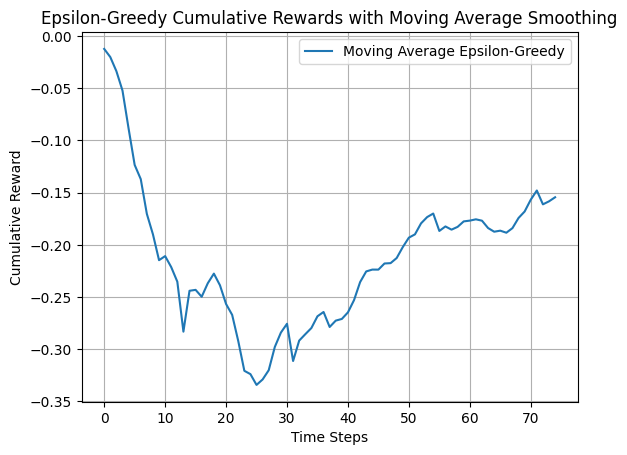

In [ ]:
# UCB with Moving Average Reward Smoothing
def ucb_with_moving_average(data, c=2.0, window=5):
    num_assets = data.shape[1]
    Q_values = np.zeros(num_assets)
    N_counts = np.zeros(num_assets)
    reward_history = []

    smoothed_data = data.rolling(window=window).mean().dropna()

    num_steps = len(smoothed_data)
    for t in range(1, num_steps):
        UCB_scores = np.zeros(num_assets)
        for a in range(num_assets):
            if N_counts[a] == 0:
                UCB_scores[a] = float('inf')
            else:
                UCB_scores[a] = Q_values[a] + c * np.sqrt(np.log(t) / N_counts[a])

        selected_asset = np.argmax(UCB_scores)
        reward = smoothed_data.iloc[t, selected_asset]
        N_counts[selected_asset] += 1
        Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
        reward_history.append(reward)

    cumulative_rewards = np.cumsum(reward_history)
    print("UCB with Moving Average Smoothing - Final Q-values:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    plt.plot(cumulative_rewards, label="Moving Average UCB")
    plt.title("UCB Cumulative Rewards with Moving Average Smoothing")
    plt.xlabel("Time Steps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# Epsilon-Greedy with Moving Average Reward Smoothing
def epsilon_greedy_with_moving_average(data, epsilon=0.1, window=5):
    num_assets = data.shape[1]
    Q_values = np.zeros(num_assets)
    N_counts = np.zeros(num_assets)
    reward_history = []

    smoothed_data = data.rolling(window=window).mean().dropna()

    num_steps = len(smoothed_data)
    for t in range(1, num_steps):
        if np.random.rand() < epsilon:
            selected_asset = np.random.randint(0, num_assets)
        else:
            selected_asset = np.argmax(Q_values)

        reward = smoothed_data.iloc[t, selected_asset]
        N_counts[selected_asset] += 1
        Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
        reward_history.append(reward)

    cumulative_rewards = np.cumsum(reward_history)
    print("Epsilon-Greedy with Moving Average Smoothing - Final Q-values:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    plt.plot(cumulative_rewards, label="Moving Average Epsilon-Greedy")
    plt.title("Epsilon-Greedy Cumulative Rewards with Moving Average Smoothing")
    plt.xlabel("Time Steps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run both moving average versions
ucb_with_moving_average(data_combined_returns_updated)
epsilon_greedy_with_moving_average(data_combined_returns_updated)


Alternative Policies (Softmax Selection with Temperature)

Softmax UCB - Final Q-values: [-0.02374644  0.00722218 -0.01212506  0.08148258  0.         -0.08538826
  0.          0.06001769  0.          0.          0.02295664  0.
  0.07381008  0.03448842  0.          0.02878309  0.          0.
  0.00353997 -0.01661782  0.00070625 -0.01846515  0.          0.00413545
  0.02332352 -0.03359133  0.          0.00995064 -0.07060468  0.0025194 ]
Total accumulated rewards: 0.13712537510587353


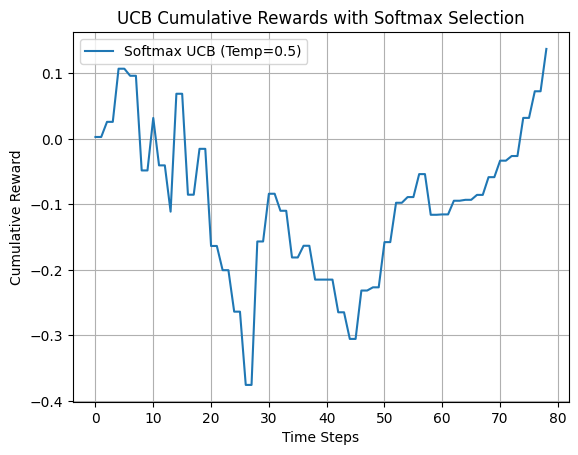

Softmax Epsilon-Greedy - Final Q-values: [-3.64573513e-02  0.00000000e+00  4.82115175e-02 -3.98585461e-02
  7.46715625e-05 -3.65747971e-02  0.00000000e+00 -6.31771082e-02
 -3.05301751e-02  0.00000000e+00 -5.14623559e-02  3.50568412e-03
  0.00000000e+00  5.82627235e-02  0.00000000e+00  6.83754145e-03
  1.90937689e-02  2.52822297e-02  2.88061198e-02 -5.20746292e-03
  5.37341546e-03  2.91940274e-02 -2.10873092e-03  1.33930313e-03
  7.67449219e-03 -3.38732837e-03  0.00000000e+00  0.00000000e+00
 -1.02381370e-02  6.26553203e-02]
Total accumulated rewards: -0.07247363241253424


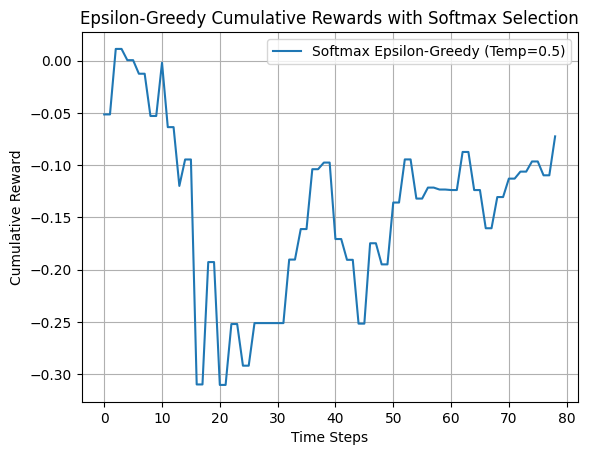

In [ ]:
# Softmax Selection for UCB
def softmax_ucb(data, temperature=1.0):
    num_assets = data.shape[1]
    Q_values = np.zeros(num_assets)
    N_counts = np.zeros(num_assets)
    reward_history = []

    num_steps = len(data)
    for t in range(1, num_steps):
        exp_values = np.exp(Q_values / temperature)
        probabilities = exp_values / np.sum(exp_values)
        selected_asset = np.random.choice(range(num_assets), p=probabilities)

        reward = data.iloc[t, selected_asset]
        N_counts[selected_asset] += 1
        Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
        reward_history.append(reward)

    cumulative_rewards = np.cumsum(reward_history)
    print("Softmax UCB - Final Q-values:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    plt.plot(cumulative_rewards, label=f"Softmax UCB (Temp={temperature})")
    plt.title("UCB Cumulative Rewards with Softmax Selection")
    plt.xlabel("Time Steps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# Softmax Selection for Epsilon-Greedy
def softmax_epsilon_greedy(data, temperature=1.0):
    num_assets = data.shape[1]
    Q_values = np.zeros(num_assets)
    N_counts = np.zeros(num_assets)
    reward_history = []

    num_steps = len(data)
    for t in range(1, num_steps):
        exp_values = np.exp(Q_values / temperature)
        probabilities = exp_values / np.sum(exp_values)
        selected_asset = np.random.choice(range(num_assets), p=probabilities)

        reward = data.iloc[t, selected_asset]
        N_counts[selected_asset] += 1
        Q_values[selected_asset] += (reward - Q_values[selected_asset]) / N_counts[selected_asset]
        reward_history.append(reward)

    cumulative_rewards = np.cumsum(reward_history)
    print("Softmax Epsilon-Greedy - Final Q-values:", Q_values)
    print("Total accumulated rewards:", sum(reward_history))

    plt.plot(cumulative_rewards, label=f"Softmax Epsilon-Greedy (Temp={temperature})")
    plt.title("Epsilon-Greedy Cumulative Rewards with Softmax Selection")
    plt.xlabel("Time Steps")
    plt.ylabel("Cumulative Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run both softmax versions
softmax_ucb(data_combined_returns_updated, temperature=0.5)
softmax_epsilon_greedy(data_combined_returns_updated, temperature=0.5)


# **References**


Auer, Peter. “Using Conﬁdence Bounds for Exploitation-Exploration Trade-Oﬀs.” Journal of Machine Learning Research, vol. 3, 2002, pp. 397–422.

Bubeck, Sébastien, and Nicolò Cesa-Bianchi. Regret Analysis of Stochastic and Nonstochastic Multi-Armed Bandit Problems. 2, arXiv, 2012. DOI.org (Datacite), https://doi.org/10.48550/ARXIV.1204.5721.

Cesa-Bianchi, Nicolo, and Gabor Lugosi. Prediction, Learning, and Games. 1st ed., Cambridge University Press, 2006. DOI.org (Crossref), https://doi.org/10.1017/CBO9780511546921.

Huo, Xiaoguang, and Feng Fu. “Risk-Aware Multi-Armed Bandit Problem with Application to Portfolio Selection.” Royal Society Open Science, vol. 4, no. 11, Nov. 2017, p. 171377. DOI.org (Crossref), https://doi.org/10.1098/rsos.171377.

Lai, T. L., and Herbert Robbins. “Asymptotically Efficient Adaptive Allocation Rules.” Advances in Applied Mathematics, vol. 6, no. 1, Mar. 1985, pp. 4–22. DOI.org (Crossref), https://doi.org/10.1016/0196-8858(85)90002-8.

Lattimore, Tor, and Csaba Szepesvári. Bandit Algorithms. 1st ed., Cambridge University Press, 2020. DOI.org (Crossref), https://doi.org/10.1017/9781108571401.

Li, Bin, and Steven C. H. Hoi. “Online Portfolio Selection: A Survey.” ACM Computing Surveys, vol. 46, no. 3, Jan. 2014, pp. 1–36. DOI.org (Crossref), https://doi.org/10.1145/2512962.

Markowitz, Harry. “PORTFOLIO SELECTION*.” The Journal of Finance, vol. 7, no. 1, Mar. 1952, pp. 77–91. DOI.org (Crossref), https://doi.org/10.1111/j.1540-6261.1952.tb01525.x.

Shen, Weiwei, et al. Portfolio Choices with Orthogonal Bandit Learning. 2015.

Shipra Agrawal and Navin Goyal. “Thompson Sampling for Contextual Bandits with Linear Payoffs.” Proceedings of the 30th International Conference on Machine Learning, edited by Sanjoy Dasgupta and David McAllester, vol. 28, no. 3, PMLR, 2013, pp. 127–35. Proceedings of Machine Learning Research, https://proceedings.mlr.press/v28/agrawal13.html.

Sutton, Richard S., and Andrew Barto. Reinforcement Learning: An Introduction. Second edition, The MIT Press, 2018.
